In [1213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Read Data

In [1214]:
train = pd.read_csv('../Dataset/FitbitTrainDataFixed.csv')
test = pd.read_csv('../Dataset/FitbitTestDataFixed.csv')

In [1215]:
len(train.columns)

30

In [1216]:
train.tail()

Total_MET  Avg_METs  TrackerDistance  TotalDistance  DistancePerStep  \
746    -1.4132   -1.6092          -1.4060        -1.4034          -3.1951   
747    -0.7562   -0.8910          -0.9727        -0.9721           0.1202   
748     0.1254    0.0727           0.4677         0.4617           0.6443   
749     0.2906    0.2532           0.4753         0.4693           0.5877   
750    -0.2958   -0.3877          -0.5010        -0.5026           0.0577   

     StepsbyDistance  TotalActiveDistance  TotalSteps  TotalActiveMinutes  \
746          -3.1948              -1.3865     -1.5010             -1.8903   
747           0.4221              -0.9582     -1.0099             -0.4988   
748          -0.0716               0.4660      0.3324              0.5035   
749          -0.0249               0.4862      0.3675              0.1804   
750           0.4916              -0.4869     -0.4558             -0.0680   

     AverageActiveMinutes  ...  ActiveGroup  AveragePace  VeryActiveRatio  \
746               -1.8903  ...      -1.1354      -1.6538          -0.6139   
747               -0.4988  ...      -1.1354      -0.8944          -0.6139   
748                0.5035  ...       0.2224       0.2548          -0.4588   
749                0.1804  ...       0.2224       0.5615          -0.2799   
750               -0.0680  ...      -0.4565      -0.4429          -0.6139   

     VeryActiveDistance  ActiveDistanceRatio  FairlyActiveMinutes  \
746             -0.5781              -3.1769              -0.6806   
747             -0.5781               0.3058              -0.2863   
748             -0.3836               0.3073               1.4884   
749             -0.3469               0.3312               1.2419   
750             -0.5781               0.3264              -0.6806   

     FairlyActiveRatio  TotalUsageMinutes  ModeratelyActiveDistance  Calories  
746            -0.6520             0.8319                   -0.6396      1347  
747            -0.3571             0.8319                   -0.2527      1529  
748             0.9698             0.8319                    1.6043      3012  
749             1.1542            -0.2659                    1.2064      2899  
750            -0.6520             0.8319                   -0.6396      1827  

[5 rows x 30 columns]

In [1217]:
test.tail()

Total_MET  Avg_METs  TrackerDistance  TotalDistance  DistancePerStep  \
183    -0.2296   -0.3154          -0.5775        -0.5787           0.0564   
184    -0.6918   -0.8206          -0.8452        -0.8452           0.3765   
185    -0.3682   -0.4669          -0.6158        -0.6168           0.0999   
186     2.0122    2.1352           3.2107         3.1921           1.2737   
187    -0.6195   -0.7416          -0.7101        -0.7107           0.3807   

     StepsbyDistance  TotalActiveDistance  TotalSteps  TotalActiveMinutes  \
183           0.4931              -0.5629     -0.5437              0.1556   
184           0.1626              -0.8290     -0.9111             -0.9129   
185           0.4445              -0.6009     -0.6000             -0.2089   
186          -0.5114               3.1876      2.3803              0.7354   
187           0.1587              -0.6947     -0.7698             -0.5982   

     AverageActiveMinutes  ...  ActiveGroup  AveragePace  VeryActiveRatio  \
183                0.1556  ...      -1.1354      -0.6664          -0.6139   
184               -0.9129  ...      -1.1354      -0.2547          -0.6139   
185               -0.2089  ...      -1.1354      -0.5078          -0.6139   
186                0.7354  ...       1.5802       2.6335           1.0028   
187               -0.5982  ...      -1.1354      -0.3405          -0.5758   

     VeryActiveDistance  ActiveDistanceRatio  FairlyActiveMinutes  \
183             -0.5781               0.3264              -0.6806   
184             -0.5781               0.3264              -0.6806   
185             -0.5781               0.3264              -0.6806   
186              3.4651               0.3148               0.2560   
187             -0.5524               0.3264              -0.3356   

     FairlyActiveRatio  TotalUsageMinutes  ModeratelyActiveDistance  Calories  
183            -0.6520             0.4174                   -0.6396      1856  
184            -0.6520             0.8319                   -0.6396      2489  
185            -0.6520             0.5257                   -0.6396      2076  
186             0.0483             0.8319                    0.1231      3679  
187            -0.2087            -1.4160                   -0.2969      2580  

[5 rows x 30 columns]

In [1218]:
train.columns

Index(['Total_MET', 'Avg_METs', 'TrackerDistance', 'TotalDistance',
       'DistancePerStep', 'StepsbyDistance', 'TotalActiveDistance',
       'TotalSteps', 'TotalActiveMinutes', 'AverageActiveMinutes',
       'ActiveRatio', 'DistanceIntensity', 'InactiveRatio', 'SedentaryMinutes',
       'SedentaryRatio', 'ActivityRank', 'LightlyActiveMinutes',
       'VeryActiveMinutes', 'LightActiveDistance', 'LightlyActiveRatio',
       'ActiveGroup', 'AveragePace', 'VeryActiveRatio', 'VeryActiveDistance',
       'ActiveDistanceRatio', 'FairlyActiveMinutes', 'FairlyActiveRatio',
       'TotalUsageMinutes', 'ModeratelyActiveDistance', 'Calories'],
      dtype='object')

# Robust Scaler

In [1219]:
# from sklearn.preprocessing import RobustScaler

# # Inisialisasi RobustScaler
# robust_scaler = RobustScaler()

# # Tentukan kolom yang akan diskalakan (semua kolom kecuali 'Calories')
# col_to_scale = [col for col in train.columns if col != "Calories"]

# # Fit scaler pada data pelatihan dan transformasi
# train[col_to_scale] = robust_scaler.fit_transform(train[col_to_scale])

# # Transformasi data pengujian dengan scaler yang sama
# test[col_to_scale] = robust_scaler.transform(test[col_to_scale])

# Standard Scaler

di comment karena datanya sudah scaled di preprocessing

In [1220]:
# from sklearn.preprocessing import StandardScaler

# # Inisialisasi RobustScaler
# scaler = StandardScaler()

# # Tentukan kolom yang akan diskalakan (semua kolom kecuali 'Calories')
# col_to_scale = [col for col in train.columns if col != "Calories"]

# # Fit scaler pada data pelatihan dan transformasi
# train[col_to_scale] = scaler.fit_transform(train[col_to_scale])

# # Transformasi data pengujian dengan scaler yang sama
# test[col_to_scale] = scaler.transform(test[col_to_scale])

# Correlation Matrix

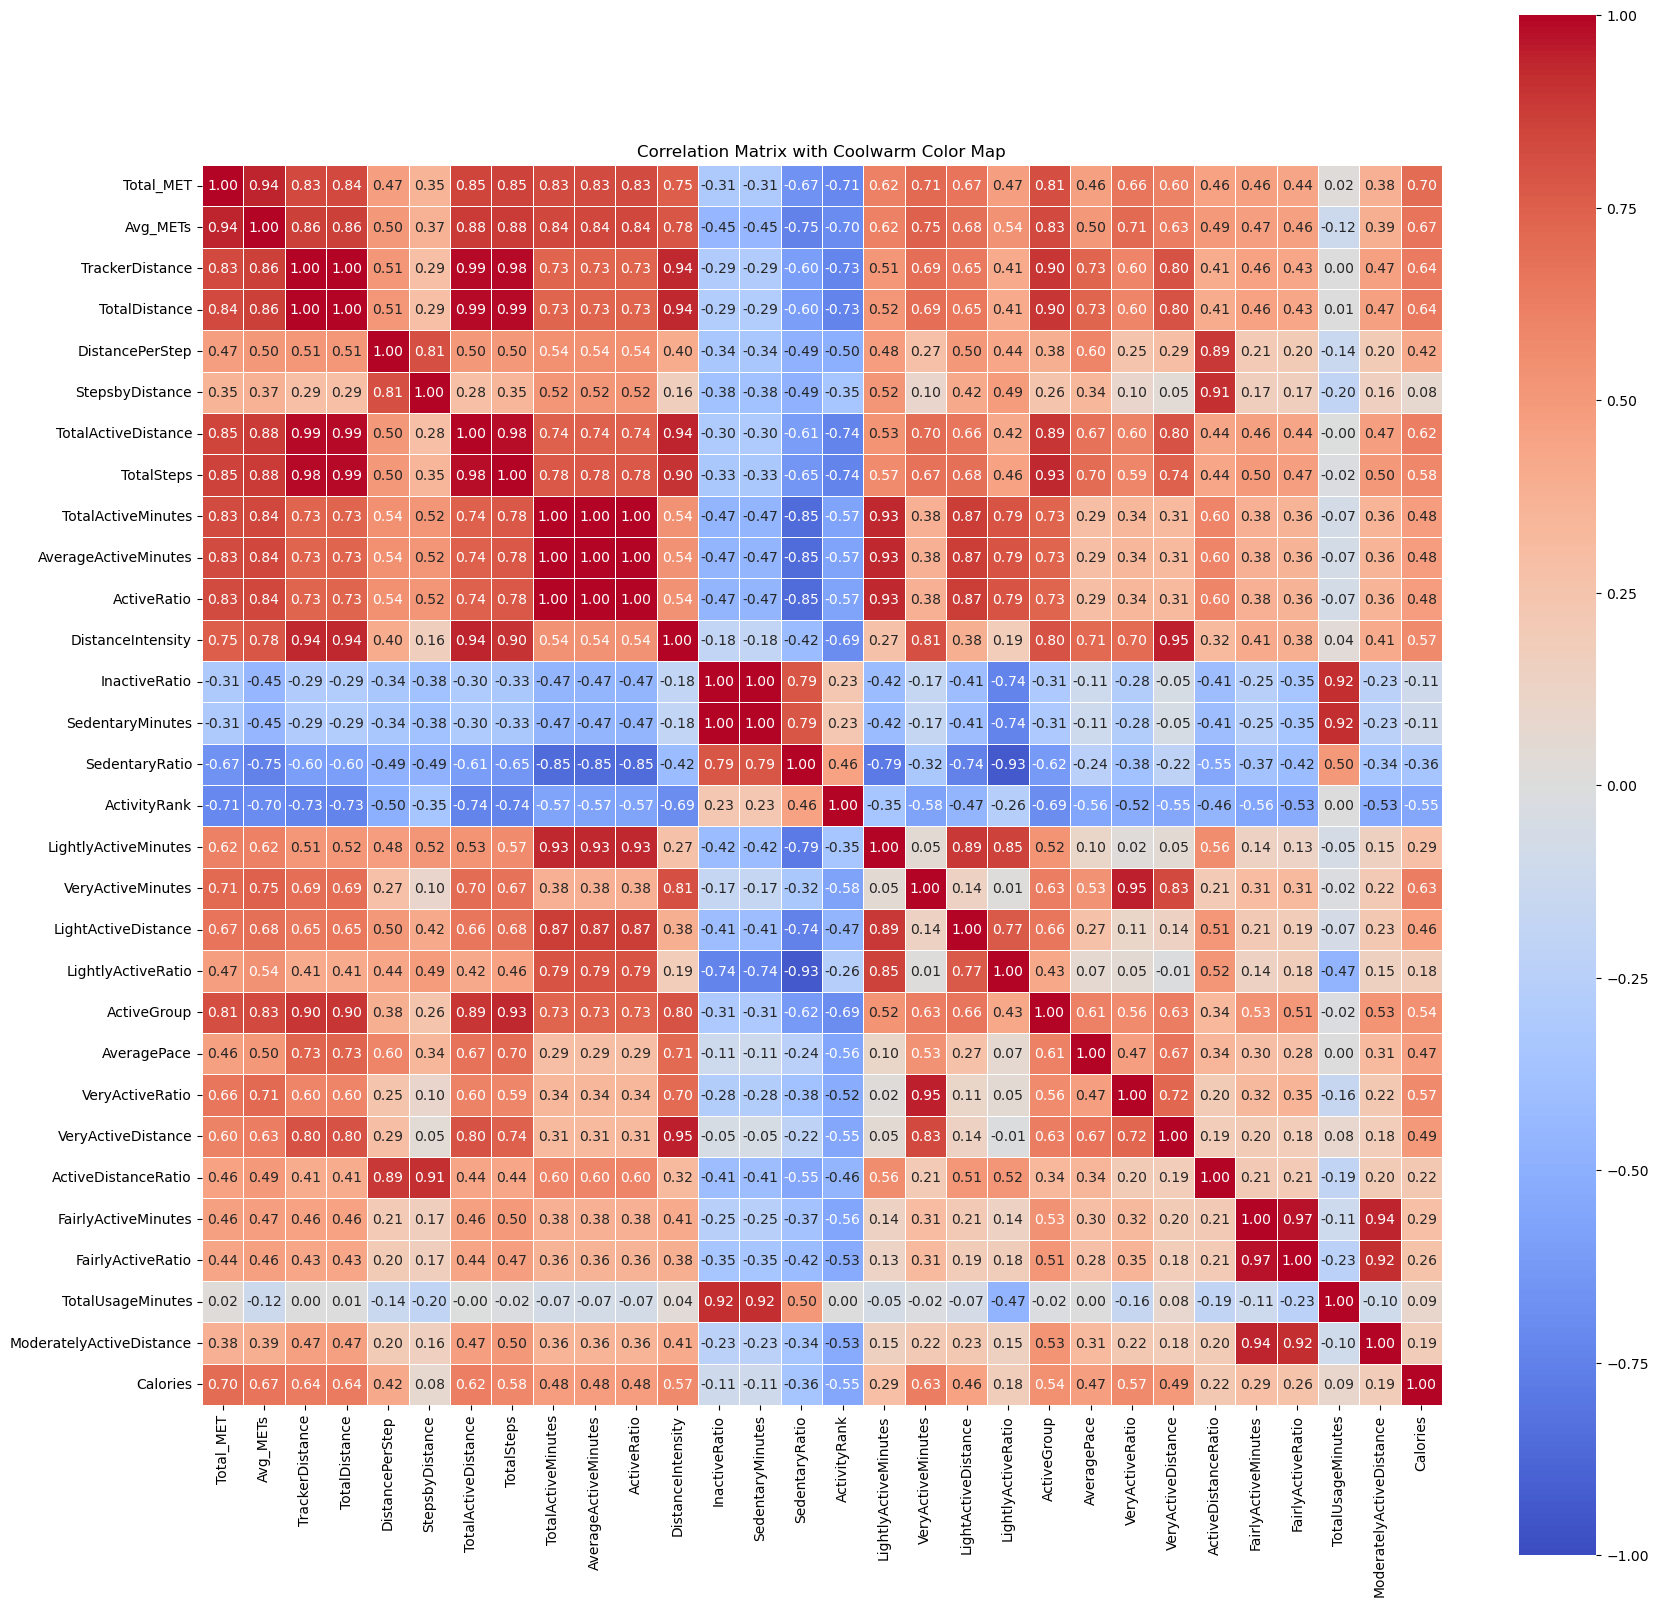

In [1221]:
# Pearson untuk standardscaler, spearman untuk robustscaler
correlation_matrix = train.corr(method='pearson')

# Langkah 2: Plot matriks korelasi menggunakan seaborn dengan cmap 'coolwarm'
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Matrix with Coolwarm Color Map')
plt.show()

In [1222]:
correlation_matrix

Total_MET  Avg_METs  TrackerDistance  TotalDistance  \
Total_MET                    1.0000    0.9422           0.8346         0.8354   
Avg_METs                     0.9422    1.0000           0.8635         0.8644   
TrackerDistance              0.8346    0.8635           1.0000         0.9995   
TotalDistance                0.8354    0.8644           0.9995         1.0000   
DistancePerStep              0.4696    0.5045           0.5117         0.5113   
StepsbyDistance              0.3543    0.3732           0.2863         0.2853   
TotalActiveDistance          0.8453    0.8760           0.9901         0.9907   
TotalSteps                   0.8530    0.8804           0.9849         0.9854   
TotalActiveMinutes           0.8277    0.8399           0.7290         0.7307   
AverageActiveMinutes         0.8277    0.8399           0.7290         0.7307   
ActiveRatio                  0.8277    0.8399           0.7290         0.7307   
DistanceIntensity            0.7516    0.7831           0.9368         0.9372   
InactiveRatio               -0.3105   -0.4458          -0.2891        -0.2880   
SedentaryMinutes            -0.3105   -0.4458          -0.2891        -0.2880   
SedentaryRatio              -0.6713   -0.7471          -0.5972        -0.5972   
ActivityRank                -0.7127   -0.7009          -0.7338        -0.7344   
LightlyActiveMinutes         0.6169    0.6165           0.5134         0.5152   
VeryActiveMinutes            0.7114    0.7498           0.6896         0.6899   
LightActiveDistance          0.6674    0.6842           0.6484         0.6492   
LightlyActiveRatio           0.4705    0.5354           0.4074         0.4077   
ActiveGroup                  0.8127    0.8314           0.8962         0.8976   
AveragePace                  0.4632    0.5019           0.7315         0.7299   
VeryActiveRatio              0.6628    0.7138           0.5986         0.5983   
VeryActiveDistance           0.6019    0.6324           0.7980         0.7980   
ActiveDistanceRatio          0.4589    0.4923           0.4059         0.4053   
FairlyActiveMinutes          0.4614    0.4721           0.4604         0.4602   
FairlyActiveRatio            0.4380    0.4632           0.4346         0.4338   
TotalUsageMinutes            0.0234   -0.1236           0.0029         0.0050   
ModeratelyActiveDistance     0.3827    0.3872           0.4661         0.4666   
Calories                     0.6999    0.6651           0.6392         0.6388   

                          DistancePerStep  StepsbyDistance  \
Total_MET                          0.4696           0.3543   
Avg_METs                           0.5045           0.3732   
TrackerDistance                    0.5117           0.2863   
TotalDistance                      0.5113           0.2853   
DistancePerStep                    1.0000           0.8097   
StepsbyDistance                    0.8097           1.0000   
TotalActiveDistance                0.5021           0.2848   
TotalSteps                         0.5010           0.3470   
TotalActiveMinutes                 0.5408           0.5180   
AverageActiveMinutes               0.5408           0.5180   
ActiveRatio                        0.5408           0.5180   
DistanceIntensity                  0.4040           0.1643   
InactiveRatio                     -0.3366          -0.3805   
SedentaryMinutes                  -0.3366          -0.3805   
SedentaryRatio                    -0.4888          -0.4892   
ActivityRank                      -0.4985          -0.3463   
LightlyActiveMinutes               0.4810           0.5173   
VeryActiveMinutes                  0.2735           0.0982   
LightActiveDistance                0.5011           0.4217   
LightlyActiveRatio                 0.4367           0.4895   
ActiveGroup                        0.3832           0.2575   
AveragePace                        0.5966           0.3407   
VeryActiveRatio                    0.2506           0.0981   
VeryActiveDistance        

## Seleksi fitur, flownya mencari PASANGAN yang berkorelasi tinggi lalu drop salah satu

In [1223]:
# # Langkah 2: Tentukan threshold korelasi
# threshold = 0.7
# target = 'Calories'

# # Langkah 3: Temukan pasangan fitur dengan korelasi di atas threshold
# mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)
# high_corr_pairs = mask.stack().reset_index()
# high_corr_pairs = high_corr_pairs[high_corr_pairs[0]]
# high_corr_pairs.columns = ['Feature1', 'Feature2', 'AboveThreshold']

# # Langkah 4: Identifikasi fitur dengan korelasi lebih rendah dengan "Calories" dalam setiap pasangan
# to_drop = set()
# for _, row in high_corr_pairs.iterrows():
#     feature1, feature2 = row['Feature1'], row['Feature2']
    
#     # Jika fitur sudah di-drop, skip
#     if feature1 in to_drop or feature2 in to_drop:
#         continue
    
#     # Ambil korelasi dengan "Calories" untuk kedua fitur
#     corr_feature1 = correlation_matrix.at[feature1, target]
#     corr_feature2 = correlation_matrix.at[feature2, target]
    
#     # Simpan fitur yang memiliki korelasi lebih rendah dengan "Calories" untuk di-drop
#     if abs(corr_feature1) < abs(corr_feature2):
#         to_drop.add(feature1)
#     else:
#         to_drop.add(feature2)

# # Langkah 5: Buat DataFrame gabungan untuk fitur yang di-drop dan pasangan korelasinya
# combined_data = []
# for _, row in high_corr_pairs.iterrows():
#     feature1, feature2 = row['Feature1'], row['Feature2']
    
#     if feature1 in to_drop or feature2 in to_drop:
#         # Ambil korelasi masing-masing fitur dengan "Calories"
#         corr_feature1 = correlation_matrix.at[feature1, target]
#         corr_feature2 = correlation_matrix.at[feature2, target]
        
#         # Ambil korelasi antar fitur
#         corr_between_features = correlation_matrix.at[feature1, feature2]
        
#         combined_data.append({
#             'Dropped Feature': feature1 if feature1 in to_drop else feature2,
#             'Other Feature': feature1 if feature1 not in to_drop else feature2,
#             'Correlation with Calories Dropped Feature': corr_feature1 if feature1 in to_drop else corr_feature2,
#             'Correlation with Calories Other Feature': corr_feature2 if feature1 in to_drop else corr_feature1,
#             'Correlation Between Features': corr_between_features
#         })

# # Buat DataFrame dari data gabungan
# combined_df = pd.DataFrame(combined_data)

# # Urutkan berdasarkan korelasi antar fitur
# combined_df = combined_df.sort_values(by='Correlation Between Features', ascending=False).reset_index(drop=True)
# combined_df

In [1224]:
# to_drop

In [1225]:
# to_drop = set(to_drop)

In [1226]:
# len(to_drop)

## Seleksi fitur manual

In [1227]:
# to_drop = [
# 'Avg_METs',
# 'TotalDistance',
# 'TotalSteps',
# 'ActiveRatio',
# 'VeryActiveDistance',
# 'InactiveRatio',
# 'ActivityRank',
# 'SedentaryRatio',
# "TotalActiveMinutes",
# "SedentaryMinutes"
# ]

## Seleksi fitur: ambil sekelompok data yang correlationnya tinggi, lalu drop yang correlation dengan caloriesnya terkecil

In [1228]:
# correlation_matrix = train.corr()

# # Menginisialisasi daftar untuk fitur yang akan dihapus
# to_drop = set()  # Menggunakan set untuk menghindari duplikasi

# # Menentukan threshold korelasi
# threshold = 0.95  # Threshold yang ingin diterapkan
# print(f"Threshold korelasi: {threshold}")

# # Kolom yang akan diperiksa, kecuali 'Calories'
# checking = [x for x in correlation_matrix.columns if x != 'Calories']

# # Iterasi untuk menemukan fitur dengan korelasi tinggi
# for feature in checking:
#     # Mencari fitur yang berkorelasi tinggi dengan fitur saat ini
#     high_corr_features = correlation_matrix.index[abs(correlation_matrix[feature]) >= threshold].tolist()
#     high_corr_features.remove(feature)  # Menghindari pencocokan dengan dirinya sendiri

#     # Jika ada fitur berkorelasi tinggi
#     if high_corr_features:
#         print(f"\nFitur: {feature} berkorelasi tinggi dengan fitur: {high_corr_features}")
        
#         # Menyimpan fitur yang akan dihapus
#         to_drop.add(feature)  # Awalnya tambahkan fitur yang sedang dipertimbangkan untuk dihapus
#         target_corr = correlation_matrix[feature]['Calories']
#         print(f"Korelasi {feature} dengan Calories: {target_corr}")

#         # Tentukan fitur mana yang akan dipertahankan
#         for correlated_feature in high_corr_features:
#             correlated_target_corr = correlation_matrix[correlated_feature]['Calories']
#             print(f"Korelasi {correlated_feature} dengan Calories: {correlated_target_corr}")

#             if abs(correlated_target_corr) > abs(target_corr):
#                 # Jika fitur berkorelasi tinggi memiliki korelasi target lebih besar, pertahankan itu
#                 print(f"Mempertahankan {correlated_feature} karena memiliki korelasi target lebih tinggi.")
#                 to_drop.discard(feature)  # Hapus dari daftar penghapusan
#             else:
#                 # Hapus fitur yang memiliki korelasi target lebih rendah
#                 print(f"Menghapus {correlated_feature} karena memiliki korelasi target lebih rendah.")
#                 to_drop.add(correlated_feature)

# # Print fitur yang akan dihapus
# print("\nFitur yang akan dihapus:", to_drop)


## Seleksi fitur: kumpulkan yang korelasinya tinggi, lalu pilih salah satu, yang correlation dengan calories paling tinggi

In [1229]:
correlation_matrix = train.corr()

# Menginisialisasi daftar untuk fitur yang akan dihapus
to_drop = set()

# Menentukan threshold korelasi
threshold = 0.95

# Kolom yang akan diperiksa, kecuali 'Calories'
checking = [x for x in correlation_matrix.columns if x != 'Calories']

# Iterasi untuk menemukan fitur dengan korelasi tinggi
for feature in checking:
    # Mencari fitur yang berkorelasi tinggi dengan fitur saat ini
    high_corr_features = correlation_matrix.index[abs(correlation_matrix[feature]) >= threshold].tolist()
    high_corr_features.remove(feature)  # Menghindari pencocokan dengan dirinya sendiri

    # Jika ada fitur berkorelasi tinggi
    if high_corr_features:
        # Menyimpan fitur yang akan dihapus
        print(f"\nFitur: {feature} berkorelasi tinggi dengan fitur: {high_corr_features}")
        to_drop.add(feature)

        # Tentukan fitur mana yang akan dipertahankan berdasarkan korelasi dengan Calories
        best_corr = feature
        best_corr_value = abs(correlation_matrix[feature]['Calories'])
        
        for correlated_feature in high_corr_features:
            correlated_target_corr = abs(correlation_matrix[correlated_feature]['Calories'])
            if correlated_target_corr > best_corr_value:
                # Jika fitur berkorelasi tinggi memiliki korelasi target lebih besar, pilih itu
                best_corr = correlated_feature
                best_corr_value = correlated_target_corr

        # Tambahkan fitur terbaik yang dipilih, dan hapus fitur lainnya
        to_drop.discard(best_corr)


Fitur: TrackerDistance berkorelasi tinggi dengan fitur: ['TotalDistance', 'TotalActiveDistance', 'TotalSteps']

Fitur: TotalDistance berkorelasi tinggi dengan fitur: ['TrackerDistance', 'TotalActiveDistance', 'TotalSteps']

Fitur: TotalActiveDistance berkorelasi tinggi dengan fitur: ['TrackerDistance', 'TotalDistance', 'TotalSteps']

Fitur: TotalSteps berkorelasi tinggi dengan fitur: ['TrackerDistance', 'TotalDistance', 'TotalActiveDistance']

Fitur: TotalActiveMinutes berkorelasi tinggi dengan fitur: ['AverageActiveMinutes', 'ActiveRatio']

Fitur: AverageActiveMinutes berkorelasi tinggi dengan fitur: ['TotalActiveMinutes', 'ActiveRatio']

Fitur: ActiveRatio berkorelasi tinggi dengan fitur: ['TotalActiveMinutes', 'AverageActiveMinutes']

Fitur: InactiveRatio berkorelasi tinggi dengan fitur: ['SedentaryMinutes']

Fitur: SedentaryMinutes berkorelasi tinggi dengan fitur: ['InactiveRatio']

Fitur: VeryActiveMinutes berkorelasi tinggi dengan fitur: ['VeryActiveRatio']

Fitur: VeryActiveRat

# Drop Columns

In [1230]:
# Menampilkan fitur yang akan dihapus
print(f"{len(to_drop)} Fitur yang dihapus:\n", to_drop)

8 Fitur yang dihapus:
 {'TotalSteps', 'ActiveRatio', 'FairlyActiveRatio', 'SedentaryMinutes', 'VeryActiveRatio', 'TotalDistance', 'TotalActiveMinutes', 'TotalActiveDistance'}


In [1231]:
train = train.drop(columns=list(to_drop))
test = test.drop(columns=list(to_drop))

# Data Prep

In [1232]:
# 1. Siapkan data
X_train = train.drop(columns=['Calories'])
y_train = train['Calories']
X_test = test.drop(columns=['Calories'])
y_test = test['Calories']


# Model: Baseline

## Import Libraries

In [1233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor


In [1234]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt
import time

## Evaluation Function

### Without CV

In [1235]:
# def evaluate_model(model, model_name):
#     start_time = time.time()
#     model.fit(X_train, y_train)
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     end_time = time.time()
    
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_train = r2_score(y_train, y_pred_train)
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_train = mean_absolute_error(y_train, y_pred_train)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Hitung residual
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals = y_test - y_pred_test
#     mean_residual = np.mean(residuals)  # Rata-rata residual

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     #y actual vs y predicted
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,  # Rata-rata residual
#         'Mean Residual Test': mean_residual,  # Rata-rata residual
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []

### With CV

In [1236]:
# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Melatih model
#     model.fit(X_train, y_train)
    
#     # Prediksi pada train dan test set
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
    
#     # Menghitung waktu pelatihan
#     end_time = time.time()
#     training_time = end_time - start_time

#     # Metrik untuk train set
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     r2_train = r2_score(y_train, y_pred_train)
#     mae_train = mean_absolute_error(y_train, y_pred_train)
#     mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    
#     # Metrik untuk test set
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Hitung residual
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals = y_test - y_pred_test
#     mean_residual = np.mean(residuals)  # Rata-rata residual

#     # Cross-validation scores untuk train set
#     cv_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
#     cv_mae_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Rata-rata metrik cross-validation untuk train set
#     cv_rmse_train_mean = np.mean(cv_rmse_train)
#     cv_r2_train_mean = np.mean(cv_r2_train)
#     cv_mae_train_mean = np.mean(cv_mae_train)
#     cv_mape_train_mean = np.mean(cv_mape_train)

#     # Cross-validation scores untuk test set (karena kita tidak memiliki label asli di dalam test set)
#     cv_rmse_test = np.sqrt(-cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_test = cross_val_score(model, X_test, y_test, scoring='r2', cv=3)
#     cv_mae_test = -cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_test = -cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Rata-rata metrik cross-validation untuk test set
#     cv_rmse_test_mean = np.mean(cv_rmse_test)
#     cv_r2_test_mean = np.mean(cv_r2_test)
#     cv_mae_test_mean = np.mean(cv_mae_test)
#     cv_mape_test_mean = np.mean(cv_mape_test)

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Y actual vs Y predicted
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': cv_rmse_train_mean, 
#         'R2 Train': cv_r2_train_mean,
#         'MAE Train': cv_mae_train_mean,
#         'MAPE Train': cv_mape_train_mean,
#         'RMSE Test': cv_rmse_test_mean, 
#         'R2 Test': cv_r2_test_mean,    
#         'MAE Test': cv_mae_test_mean,       
#         'Mean Residual Train': mean_residual_train,
#         'Mean Residual Test': mean_residual,        
#         'MAPE Test': cv_mape_test_mean              
#     }

# results = []

In [1237]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import cross_val_score, cross_val_predict
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# def evaluate_model(model, model_name):
#     start_time = time.time()

#     # Cross-validation pada train set
#     y_cv_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
#     cv_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
#     cv_mae_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Latih model pada keseluruhan train set
#     model.fit(X_train, y_train)
#     training_time = time.time() - start_time

#     # Prediksi pada train dan test set
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)

#     # Metrik untuk train set tanpa CV
#     # rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     # r2_train = r2_score(y_train, y_pred_train)
#     # mae_train = mean_absolute_error(y_train, y_pred_train)
#     # mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

#     # Metrik untuk test set
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Residuals untuk train dan test set
#     residuals_train = y_train - y_pred_train
#     residuals_test = y_test - y_pred_test

#     # Plot residual untuk train dan test
#     plt.figure(figsize=(18, 6))

#     # Plot residual train
#     plt.subplot(1, 3, 1)
#     plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Train Residuals')
#     plt.xlabel('Predicted Values (Train)')
#     plt.ylabel('Residuals (Train)')

#     # Plot residual test
#     plt.subplot(1, 3, 2)
#     plt.scatter(y_pred_test, residuals_test, color='green', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Test Residuals')
#     plt.xlabel('Predicted Values (Test)')
#     plt.ylabel('Residuals (Test)')

#     # Plot Actual vs Predicted
#     plt.subplot(1, 3, 3)
#     plt.scatter(y_test, y_pred_test, color='purple', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')

#     plt.tight_layout()
#     plt.show()

#     # Hasil akhir sebagai dictionary
#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'Train RMSE': np.mean(cv_rmse_train),  # RMSE dari CV untuk train
#         'Train R2': np.mean(cv_r2_train),
#         'Train MAE': np.mean(cv_mae_train),
#         'Train MAPE': np.mean(cv_mape_train),
#         'Test RMSE': rmse_test,
#         'Test R2': r2_test,
#         'Test MAE': mae_test,
#         'Test MAPE': mape_test,
#         'Residual Mean Train': np.mean(residuals_train),
#         'Residual Mean Test': np.mean(residuals_test)
#     }

# # Contoh penggunaan
# results = []


In [1238]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import cross_validate

# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Cross-validate the model
#     cv_results = cross_validate(model, X_train, y_train, cv=3, 
#                                 scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 
#                                          'neg_mean_absolute_percentage_error'], 
#                                 return_train_score=True)

#     # Calculate metrics from cross-validation results
#     rmse_train = np.sqrt(-np.mean(cv_results['train_neg_mean_squared_error']))
#     rmse_test = np.sqrt(mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test)))
#     r2_train = np.mean(cv_results['train_r2'])
#     r2_test = r2_score(y_test, model.predict(X_test))
#     mae_train = -np.mean(cv_results['train_neg_mean_absolute_error'])
#     mae_test = mean_absolute_error(y_test, model.predict(X_test))
#     mape_train = -np.mean(cv_results['train_neg_mean_absolute_percentage_error'])
#     mape_test = mean_absolute_percentage_error(y_test, model.predict(X_test))

#     # Hitung residual
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals_test = y_test - y_pred_test
#     mean_residual_test = np.mean(residuals_test)  # Rata-rata residual

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     # Residuals vs Predicted Values
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Actual vs Predicted Values
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     end_time = time.time()
#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,  # Rata-rata residual
#         'Mean Residual Test': mean_residual_test,  # Rata-rata residual
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []


In [1239]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import KFold

# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Inisialisasi K-Fold
#     kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
#     rmse_train_list = []
#     r2_train_list = []
#     mae_train_list = []
#     mape_train_list = []
    
#     # K-Fold Cross Validation
#     for train_index, val_index in kf.split(X_train):
#         X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#         y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
#         # Latih model pada lipatan
#         model.fit(X_train_fold, y_train_fold)
#         y_train_pred = model.predict(X_train_fold)
#         y_val_pred = model.predict(X_val_fold)
        
#         # Hitung metrik untuk lipatan
#         rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
#         r2_train_list.append(r2_score(y_train_fold, y_train_pred))
#         mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
#         mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

#     # Rata-rata metrik untuk data latih
#     rmse_train = np.mean(rmse_train_list)
#     r2_train = np.mean(r2_train_list)
#     mae_train = np.mean(mae_train_list)
#     mape_train = np.mean(mape_train_list)

#     # Latih model dengan semua data latih untuk evaluasi
#     model.fit(X_train, y_train)
    
#     # Hitung prediksi untuk data uji
#     y_test_pred = model.predict(X_test)
    
#     # Hitung metrik untuk data uji
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#     r2_test = r2_score(y_test, y_test_pred)
#     mae_test = mean_absolute_error(y_test, y_test_pred)
#     mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

#     # Hitung residual untuk data latih dan data uji
#     y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
#     residuals_train = y_train - y_train_pred
#     residuals_test = y_test - y_test_pred
#     mean_residual_train = np.mean(residuals_train)
#     mean_residual_test = np.mean(residuals_test)

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     # Residuals vs Predicted Values (data uji)
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values (Test)')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Actual vs Predicted Values (data uji)
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values (Test)')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     # Plot residuals untuk data latih
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values (Train)')
#     plt.xlabel('Predicted Values (Train)')
#     plt.ylabel('Residuals (Train)')
#     plt.show()

#     end_time = time.time()
#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,
#         'Mean Residual Test': mean_residual_test,
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []


In [1240]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)


    plt.figure(figsize=(10, 10))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(2, 2, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(2, 2, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')

    # Actual vs Predicted Values (data latih)
    plt.subplot(2, 2, 3)
    plt.scatter(y_train, y_train_pred, color='pink', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Train)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results = []


## Random Forest

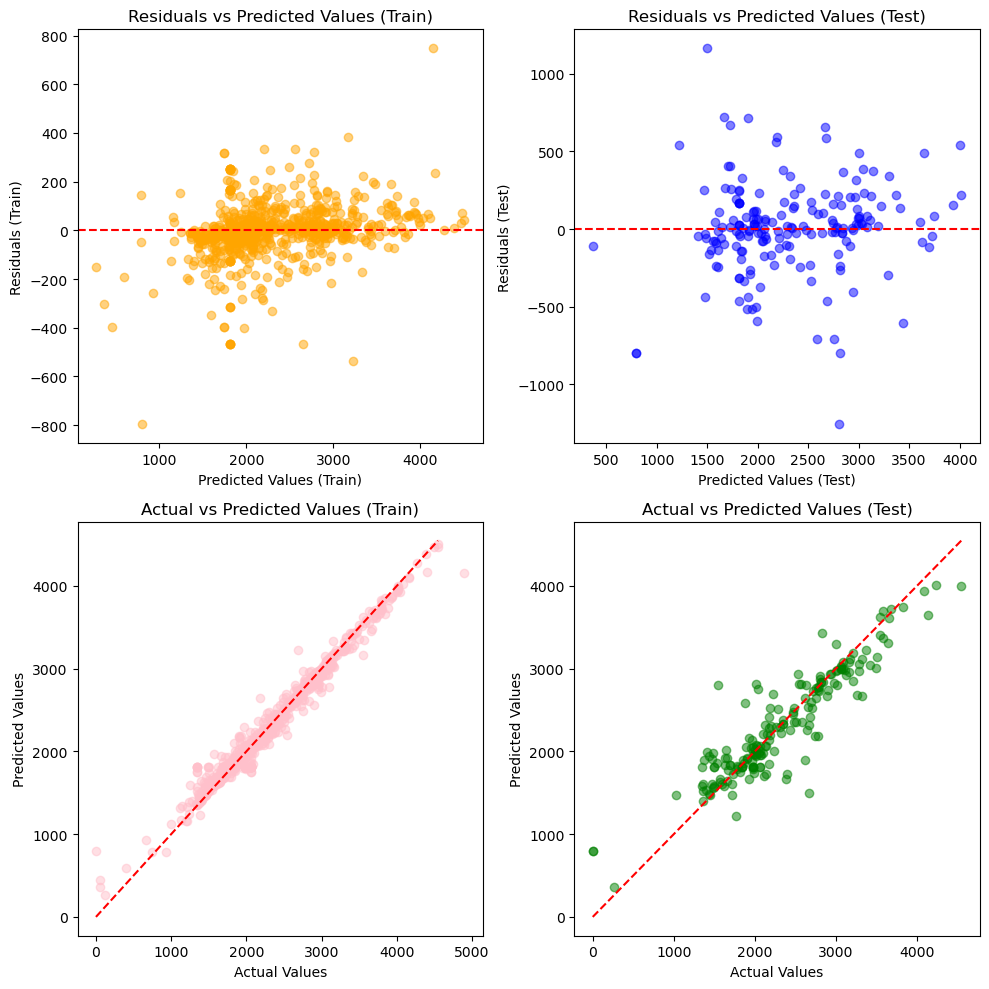

{'Model': 'Random Forest',
 'Training Time (s)': 4.140942573547363,
 'RMSE Train': 121.30557752968916,
 'RMSE Test': 298.5423098107788,
 'R2 Train': 0.97059819834146,
 'R2 Test': 0.8362601578204415,
 'MAE Train': 78.54200009746097,
 'MAE Test': 202.64355655860484,
 'Mean Residual Train': -2.9791631604647604,
 'Mean Residual Test': 9.761469797105448,
 'MAPE Train': 4195852054749812.0,
 'MAPE Test': 3.819339947816182e+16}

In [1241]:
rf_results = evaluate_model(RandomForestRegressor(random_state=42), 'Random Forest')
results.append(rf_results)
rf_results

## Linear Regression

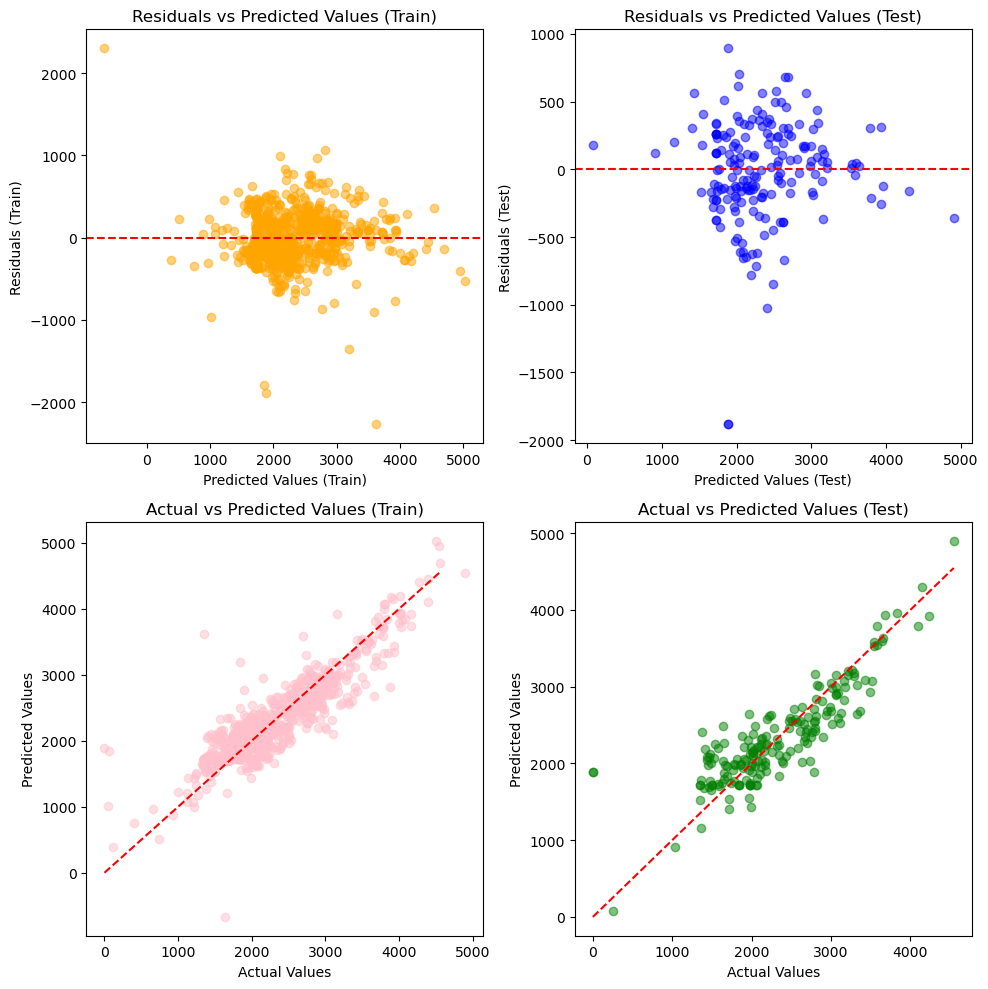

{'Model': 'Linear Regression',
 'Training Time (s)': 0.7771823406219482,
 'RMSE Train': 322.6313185896417,
 'RMSE Test': 377.40032871723804,
 'R2 Train': 0.7917080161927365,
 'R2 Test': 0.7383340946598362,
 'MAE Train': 242.18356517735288,
 'MAE Test': 275.517152679137,
 'Mean Residual Train': 6.60019457345201e-14,
 'Mean Residual Test': -12.166036291538461,
 'MAPE Train': 1.0682495895866168e+16,
 'MAPE Test': 9.026696542582219e+16}

In [1242]:
lr_results = evaluate_model(LinearRegression(), 'Linear Regression')
results.append(lr_results)
lr_results

## Ridge

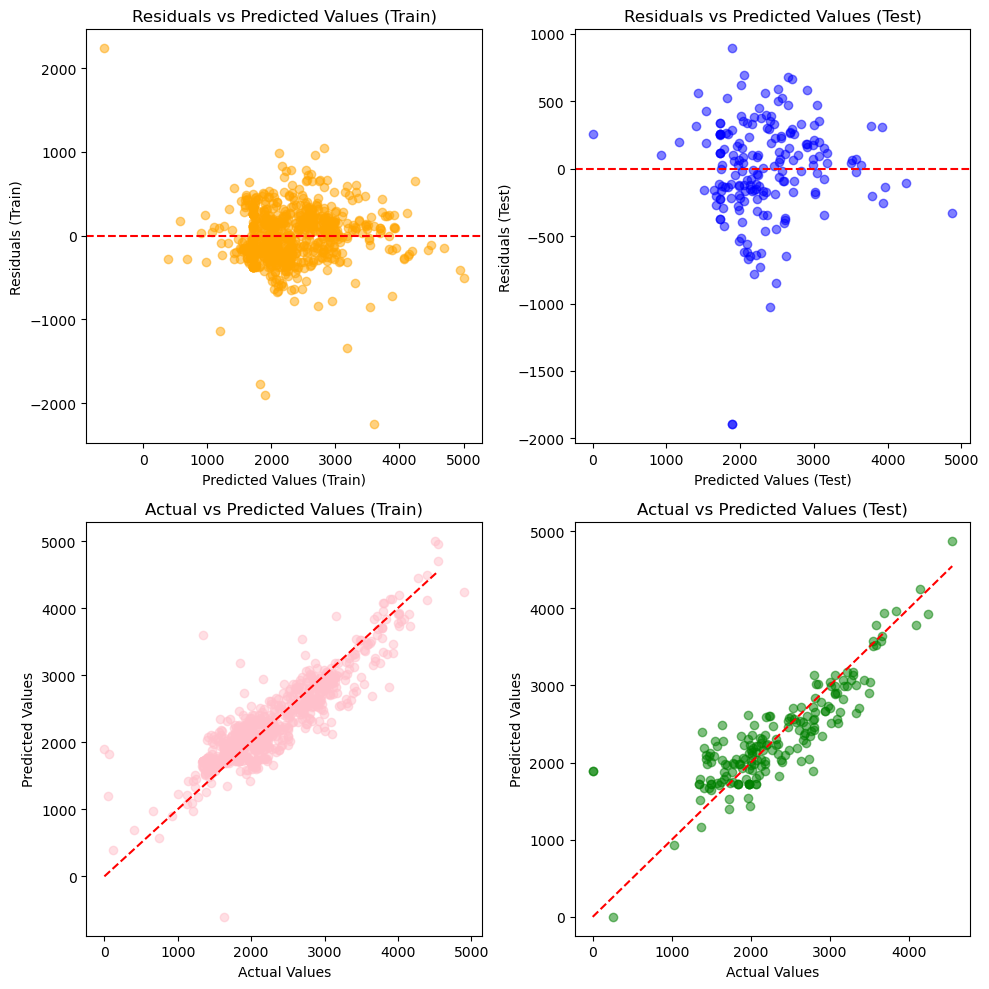

{'Model': 'Ridge',
 'Training Time (s)': 0.7881925106048584,
 'RMSE Train': 323.93026813326424,
 'RMSE Test': 379.46104124655494,
 'R2 Train': 0.7900928961296042,
 'R2 Test': 0.7354687534799326,
 'MAE Train': 243.4196531753131,
 'MAE Test': 278.08247660133287,
 'Mean Residual Train': -2.422089751725508e-15,
 'Mean Residual Test': -8.517172740383291,
 'MAPE Train': 1.0854661503502262e+16,
 'MAPE Test': 9.084181928322949e+16}

In [1243]:
ridge_results = evaluate_model(Ridge(random_state=42), 'Ridge')
results.append(ridge_results)
ridge_results

## Lasso

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.754e+05, tolerance: 2.366e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.669e+05, tolerance: 2.595e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.491e+05, tolerance: 

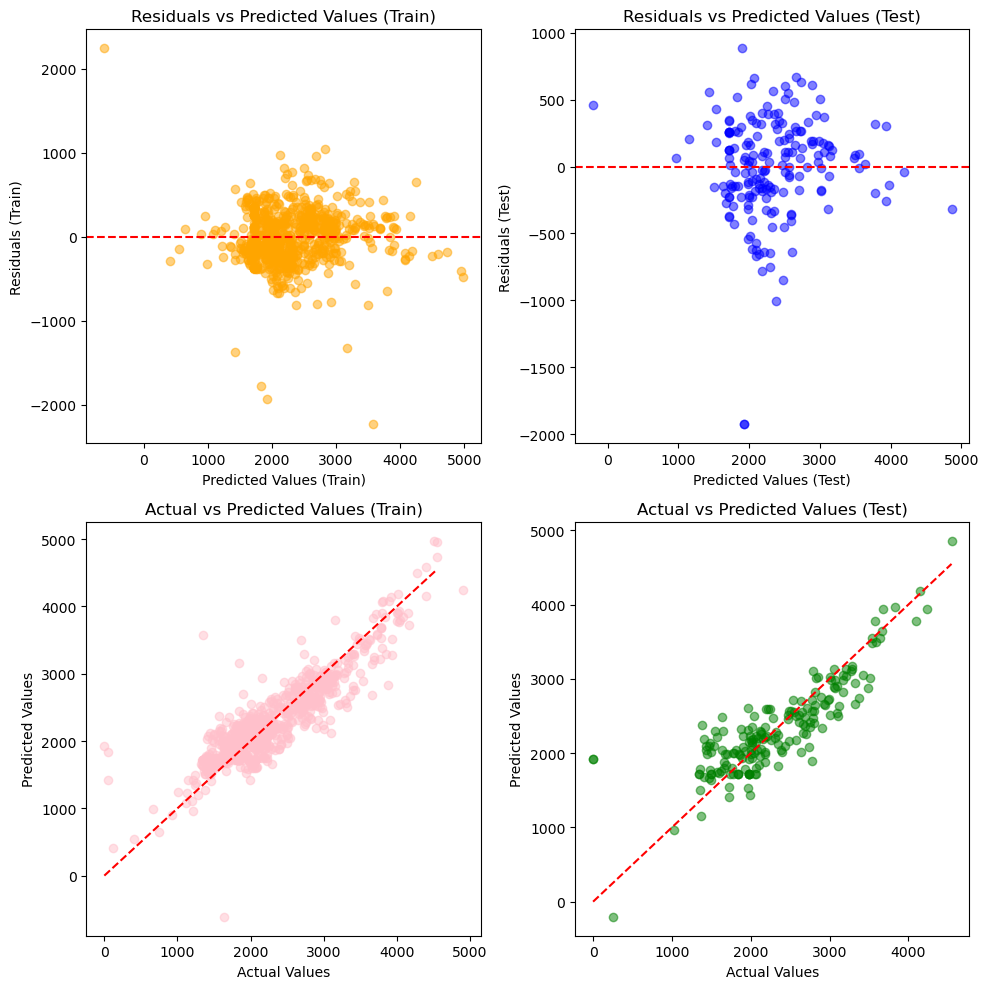

{'Model': 'Lasso',
 'Training Time (s)': 0.791196346282959,
 'RMSE Train': 324.3868420410558,
 'RMSE Test': 382.0458846653083,
 'R2 Train': 0.7894848442893668,
 'R2 Test': 0.7318525680840575,
 'MAE Train': 243.55610527849947,
 'MAE Test': 279.1616619757776,
 'Mean Residual Train': 6.479090085865733e-14,
 'Mean Residual Test': -5.6356009759217205,
 'MAPE Train': 1.095667976073416e+16,
 'MAPE Test': 9.222324445434963e+16}

In [1244]:
lasso_results = evaluate_model(Lasso(random_state=42), 'Lasso')
results.append(lasso_results)
lasso_results

## Elastic Net

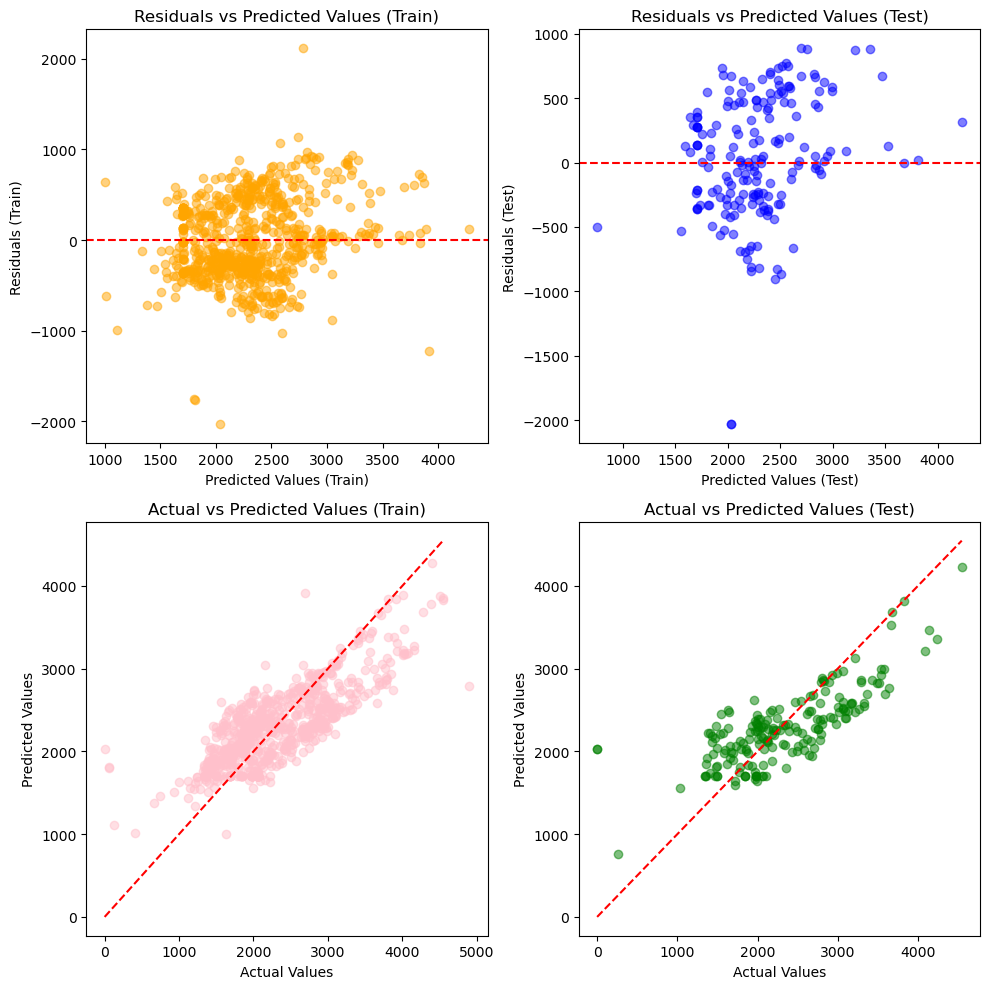

{'Model': 'Elastic Net',
 'Training Time (s)': 0.7976689338684082,
 'RMSE Train': 440.8502772535865,
 'RMSE Test': 479.163372060236,
 'R2 Train': 0.611982280691823,
 'R2 Test': 0.5781968532682107,
 'MAE Train': 361.08049812421564,
 'MAE Test': 377.1493149345177,
 'Mean Residual Train': -3.996448090347088e-14,
 'Mean Residual Test': 41.18153169887189,
 'MAPE Train': 1.1857709805781518e+16,
 'MAPE Test': 9.737901704880086e+16}

In [1245]:
elastic_net_results = evaluate_model(ElasticNet(random_state=42), 'Elastic Net')
results.append(elastic_net_results)
elastic_net_results

## Decision Tree

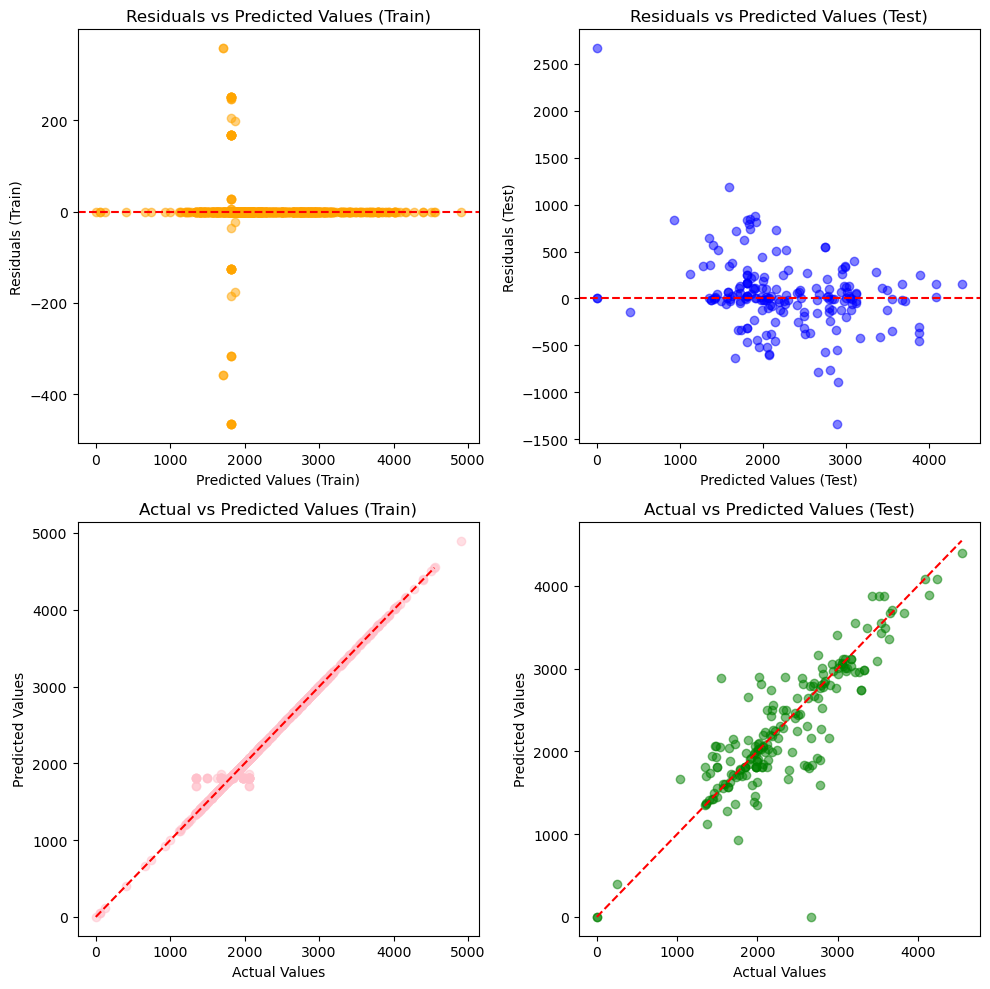

{'Model': 'Decision Tree',
 'Training Time (s)': 0.7851858139038086,
 'RMSE Train': 62.218040074736074,
 'RMSE Test': 390.70189115089227,
 'R2 Train': 0.9922584335428323,
 'R2 Test': 0.7195640948714551,
 'MAE Train': 13.773305026311014,
 'MAE Test': 241.1919621749409,
 'Mean Residual Train': 6.05522437931377e-16,
 'Mean Residual Test': 41.016075650118204,
 'MAPE Train': 0.008159970808668477,
 'MAPE Test': 0.11367647836838835}

In [1246]:
dt_results = evaluate_model(DecisionTreeRegressor(random_state=42), 'Decision Tree')
results.append(dt_results)
dt_results

## XGBoost

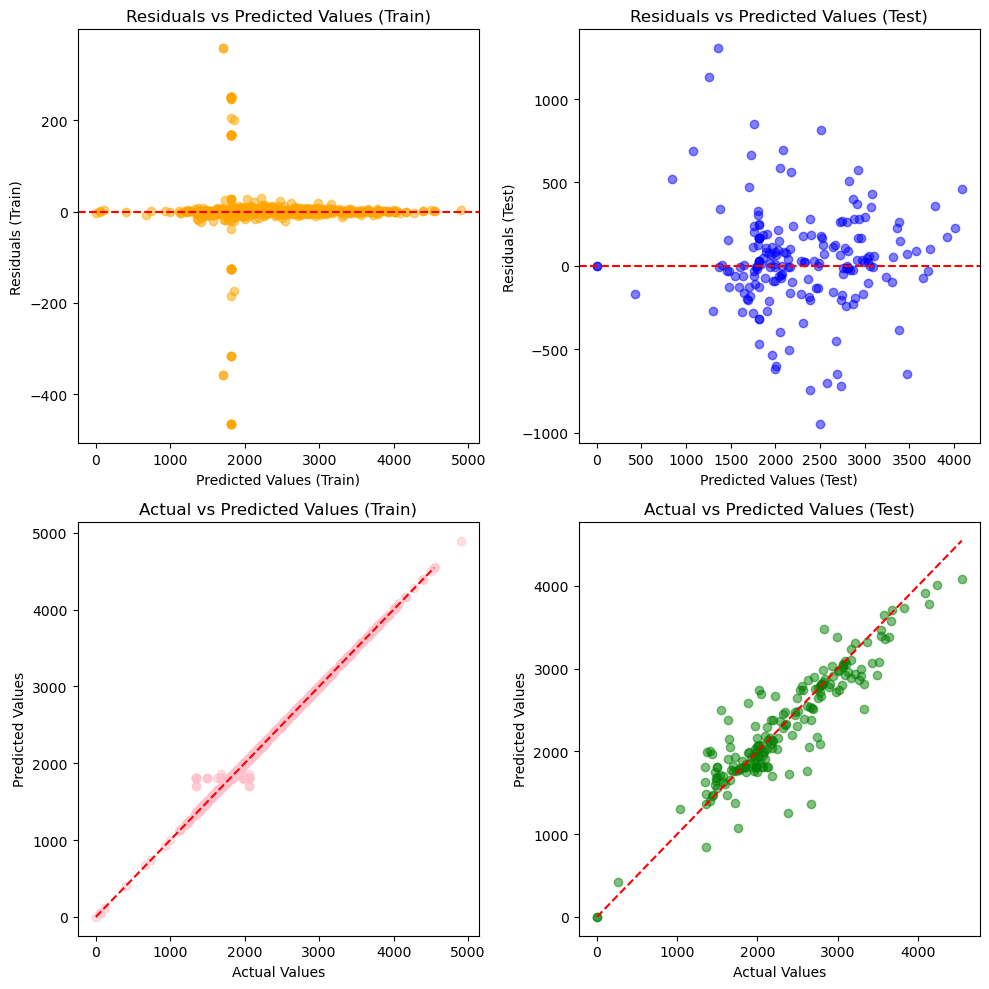

{'Model': 'XGBoost',
 'Training Time (s)': 1.5873610973358154,
 'RMSE Train': 62.51479270919529,
 'RMSE Test': 302.9949383409856,
 'R2 Train': 0.992182731628418,
 'R2 Test': 0.8313395380973816,
 'MAE Train': 15.404882318045566,
 'MAE Test': 204.13861190765462,
 'Mean Residual Train': -3.478593737402864e-05,
 'Mean Residual Test': 32.981308538863,
 'MAPE Train': 30367643727231.94,
 'MAPE Test': 113861285011978.98}

In [1247]:
xgb_results = evaluate_model(XGBRegressor(random_state=42), 'XGBoost')
results.append(xgb_results)
xgb_results

## Gradient Boosting

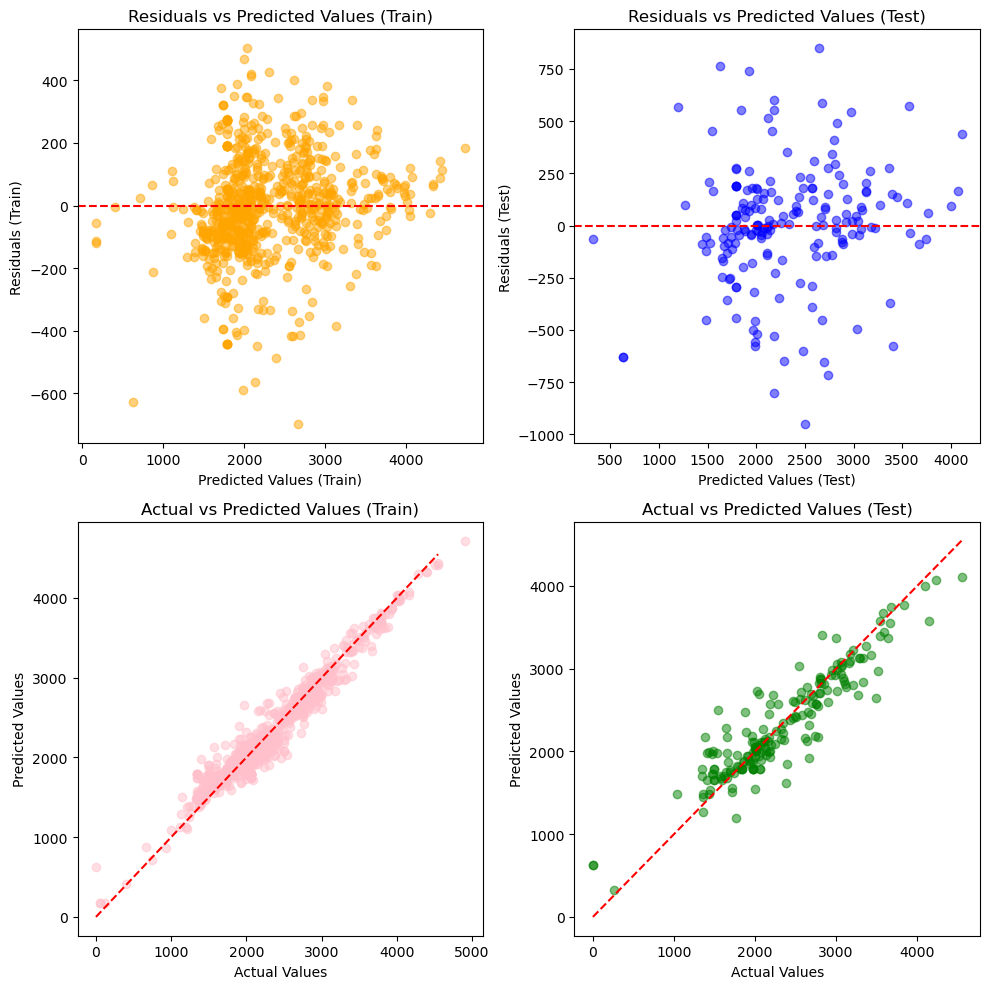

{'Model': 'Gradient Boosting',
 'Training Time (s)': 2.252509832382202,
 'RMSE Train': 146.19934877381408,
 'RMSE Test': 291.44486465952656,
 'R2 Train': 0.9572931784806276,
 'R2 Test': 0.8439530067863569,
 'MAE Train': 109.93753074044419,
 'MAE Test': 207.0107814043728,
 'Mean Residual Train': 9.143388812763792e-14,
 'Mean Residual Test': 5.012583226971971,
 'MAPE Train': 4152529419601318.0,
 'MAPE Test': 3.008558946317143e+16}

In [1248]:
gb_results = evaluate_model(GradientBoostingRegressor(random_state=42), 'Gradient Boosting')
results.append(gb_results)
gb_results

## SVR

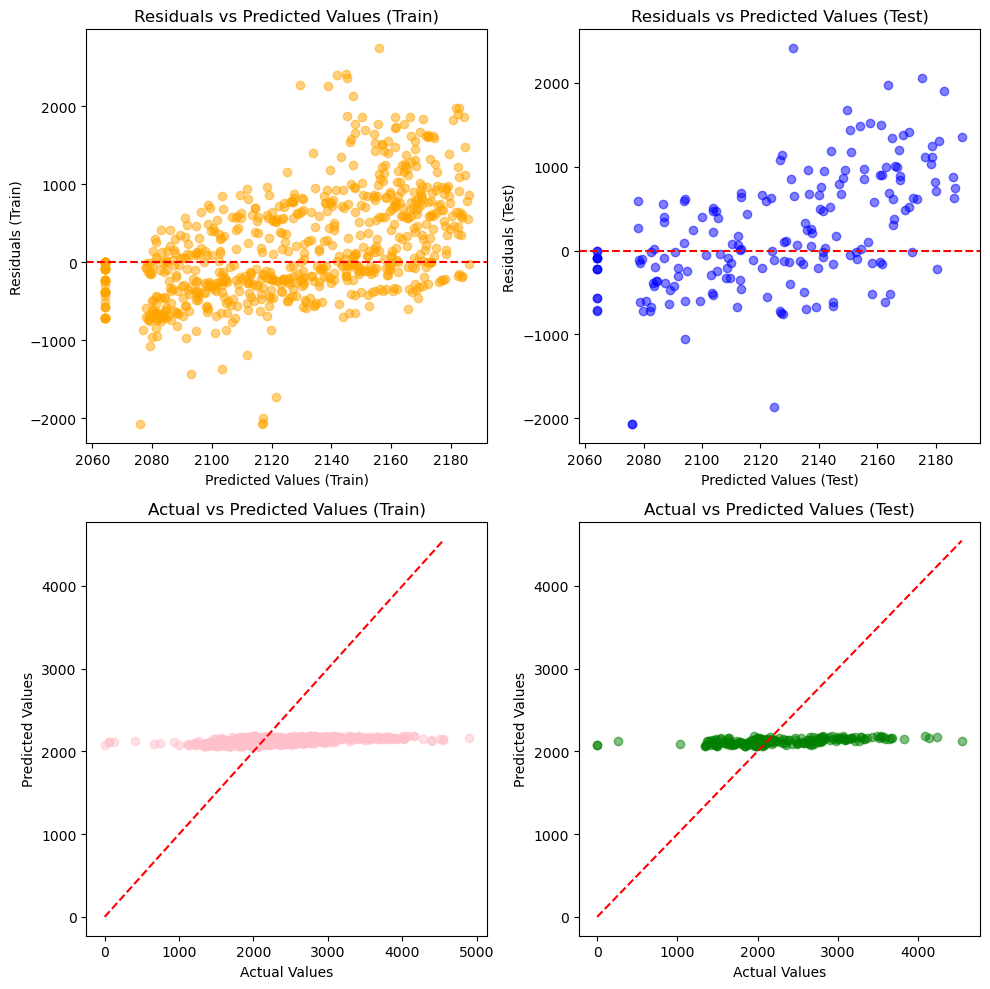

{'Model': 'Support Vector Regressor',
 'Training Time (s)': 1.091247320175171,
 'RMSE Train': 714.8224319452914,
 'RMSE Test': 744.7904974144892,
 'R2 Train': -0.019698822252871267,
 'R2 Test': -0.01908602057687281,
 'MAE Train': 540.4304677151399,
 'MAE Test': 568.467764736278,
 'Mean Residual Train': 174.1193608120853,
 'Mean Residual Test': 199.46995692236234,
 'MAPE Train': 1.2552859511754262e+16,
 'MAPE Test': 9.946045206887099e+16}

In [1249]:
svr_results = evaluate_model(SVR(), 'Support Vector Regressor')
results.append(svr_results)
svr_results

## Bayesian Ridge

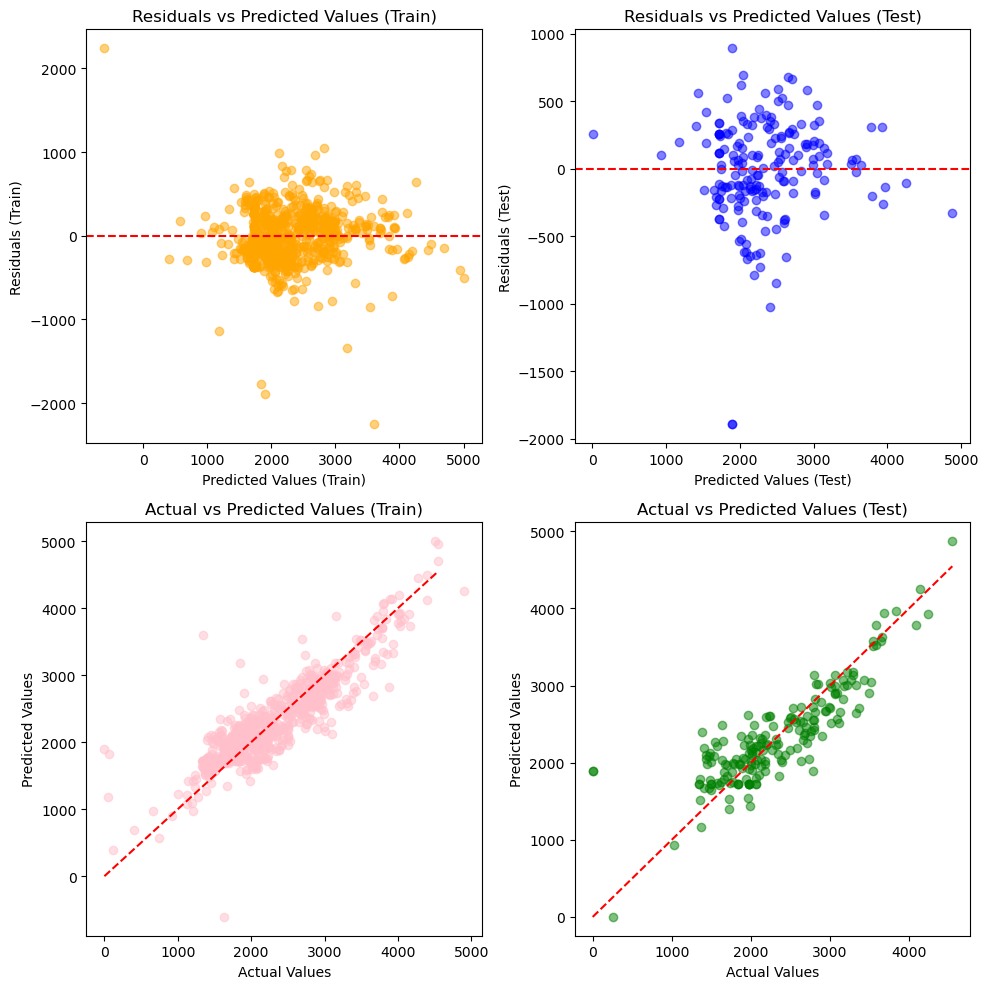

{'Model': 'Bayesian Ridge',
 'Training Time (s)': 1.6613919734954834,
 'RMSE Train': 323.4705520482236,
 'RMSE Test': 379.32395526191664,
 'R2 Train': 0.7906368867502099,
 'R2 Test': 0.7356598507051268,
 'MAE Train': 243.25221594765625,
 'MAE Test': 277.9607358324223,
 'Mean Residual Train': 4.723075015864741e-14,
 'Mean Residual Test': -8.70701366250549,
 'MAPE Train': 1.090265112927607e+16,
 'MAPE Test': 9.079203585163776e+16}

In [1250]:
br_results = evaluate_model(BayesianRidge(), 'Bayesian Ridge')
results.append(br_results)
br_results

## CatBoost

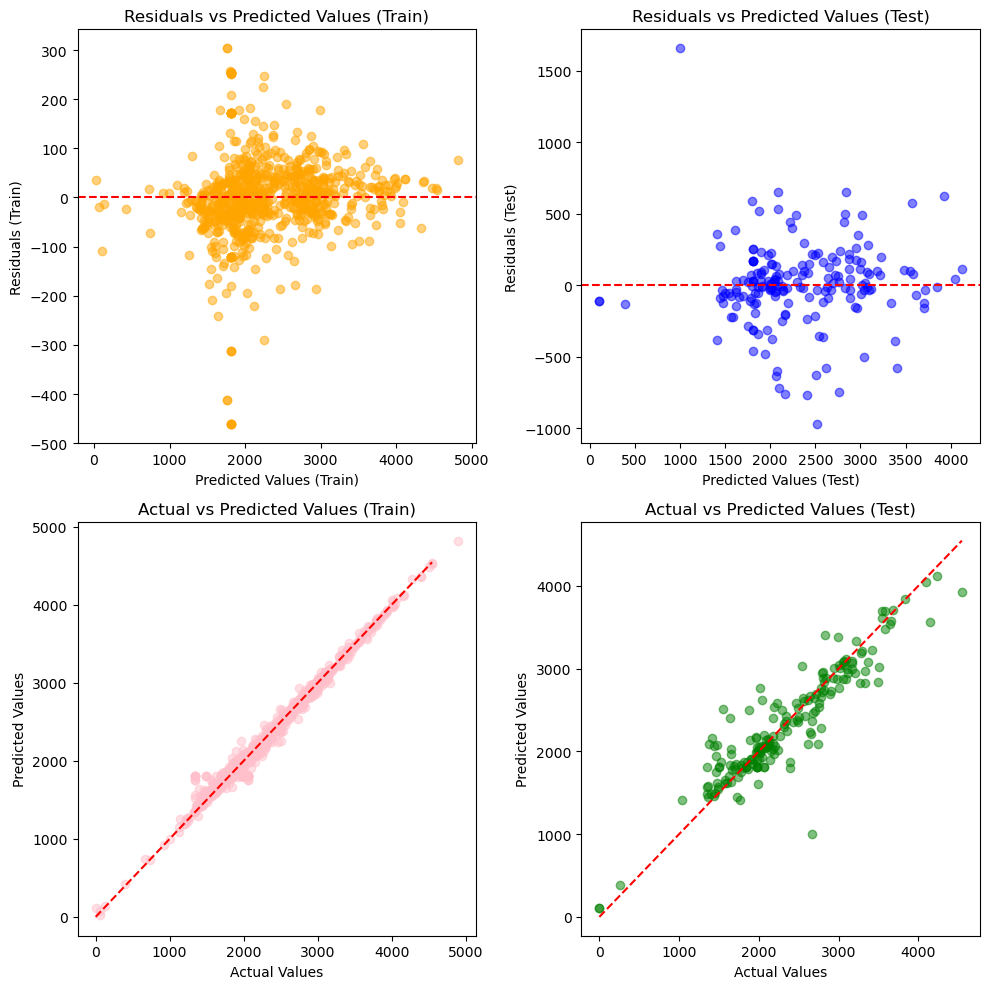

{'Model': 'CatBoost Regressor',
 'Training Time (s)': 12.458411455154419,
 'RMSE Train': 78.23193266818953,
 'RMSE Test': 292.0874407603305,
 'R2 Train': 0.9877860319958581,
 'R2 Test': 0.8432641450476362,
 'MAE Train': 47.84279670090449,
 'MAE Test': 191.86327216284428,
 'Mean Residual Train': -0.018767782291108363,
 'Mean Residual Test': 6.150398111537246,
 'MAPE Train': 752853743676532.0,
 'MAPE Test': 5199582449816053.0}

In [1251]:
cb_results = evaluate_model(CatBoostRegressor(random_state=42, silent=True), 'CatBoost Regressor')
results.append(cb_results)
cb_results

## LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 21
[LightGBM] [Info] Start training from score 2315.098000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

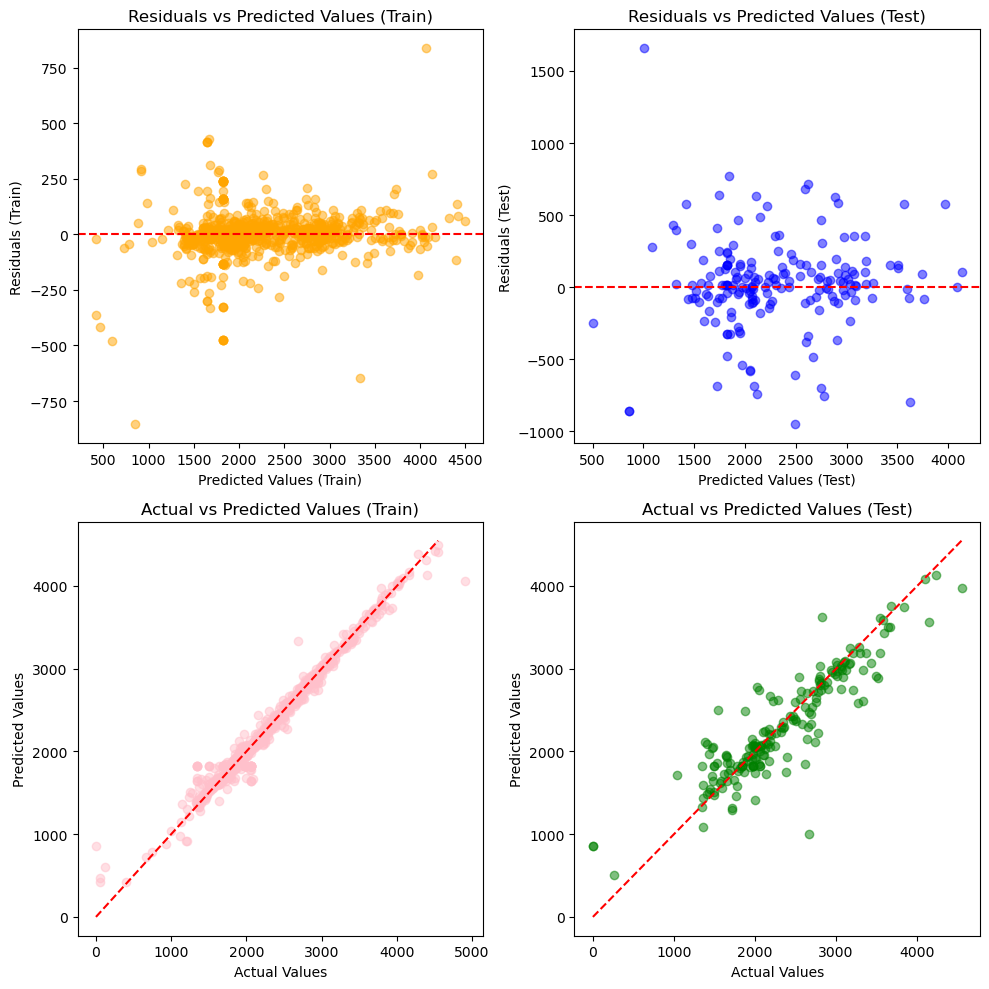

{'Model': 'LightGBM Regressor',
 'Training Time (s)': 1.054236888885498,
 'RMSE Train': 124.25529151100083,
 'RMSE Test': 320.88841337420007,
 'R2 Train': 0.9691820598580506,
 'R2 Test': 0.8108306977251758,
 'MAE Train': 72.82910876352531,
 'MAE Test': 211.18734531223225,
 'Mean Residual Train': 1.534410933450859e-08,
 'Mean Residual Test': 19.981065861113702,
 'MAPE Train': 5898678374303645.0,
 'MAPE Test': 4.097583913870502e+16}

In [1252]:
lgbm_results = evaluate_model(LGBMRegressor(random_state=42), 'LightGBM Regressor')
results.append(lgbm_results)
lgbm_results

## ExtraTrees

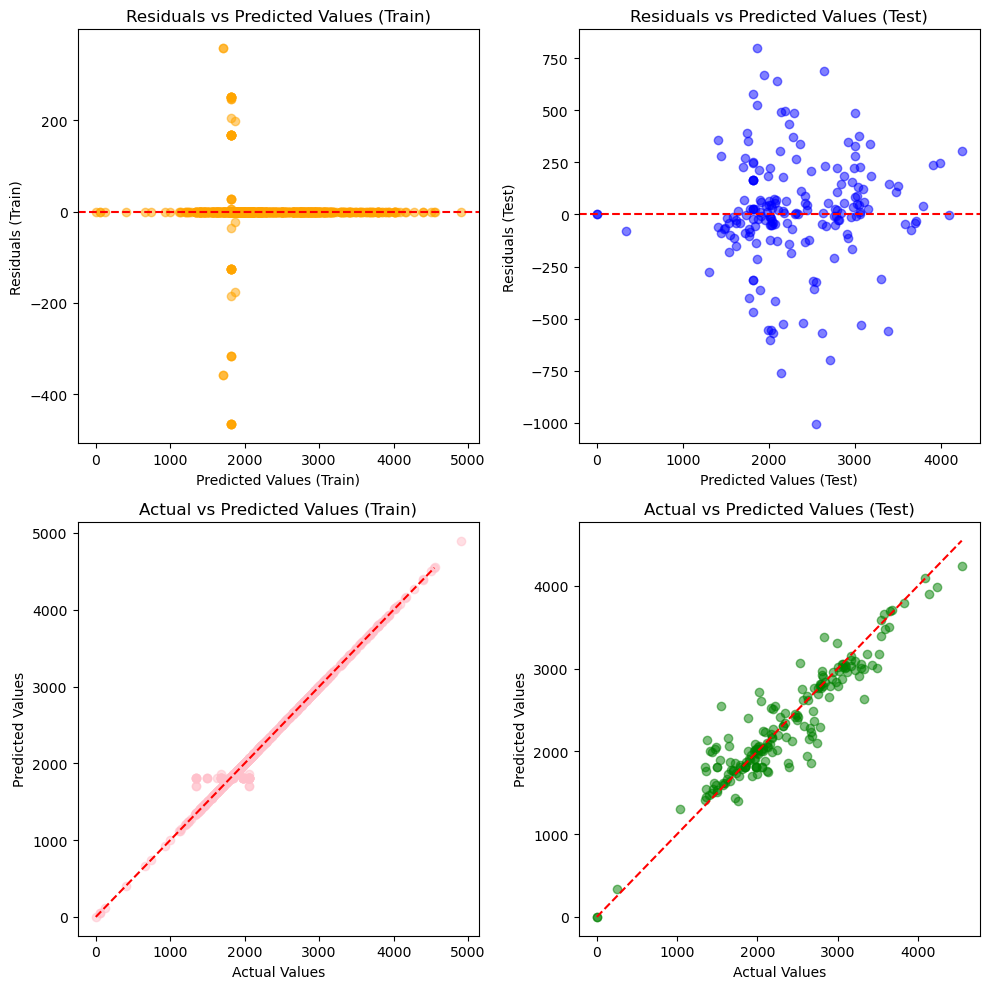

{'Model': 'Extra Trees Regressor',
 'Training Time (s)': 2.4855799674987793,
 'RMSE Train': 62.218040074736074,
 'RMSE Test': 265.0117055539716,
 'R2 Train': 0.992258433542832,
 'R2 Test': 0.8709753455937401,
 'MAE Train': 13.773305026311021,
 'MAE Test': 179.81240780141854,
 'Mean Residual Train': 1.368480709724912e-13,
 'Mean Residual Test': 14.897478723404411,
 'MAPE Train': 0.008159970808668477,
 'MAPE Test': 0.08642044963403418}

In [1253]:
et_results = evaluate_model(ExtraTreesRegressor(random_state=42), 'Extra Trees Regressor')
results.append(et_results)
et_results

## AdaBoost

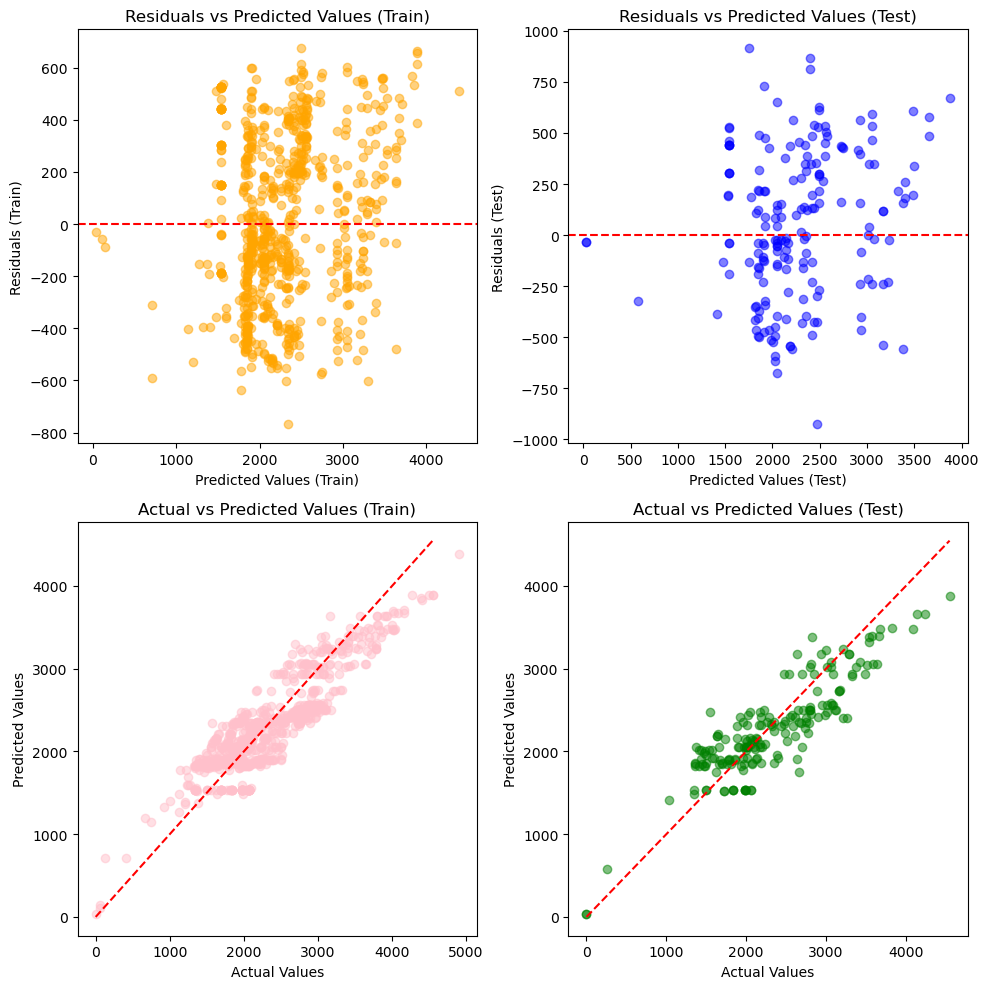

{'Model': 'AdaBoostRegressor',
 'Training Time (s)': 1.6043710708618164,
 'RMSE Train': 290.2371266609912,
 'RMSE Test': 364.57103550208956,
 'R2 Train': 0.8319163370182373,
 'R2 Test': 0.7558217854511817,
 'MAE Train': 247.67618858760102,
 'MAE Test': 303.6248880200934,
 'Mean Residual Train': 19.027389314710696,
 'Mean Residual Test': 56.124908795236266,
 'MAPE Train': 499906572954365.7,
 'MAPE Test': 1533140298679317.8}

In [1254]:
ab_results = evaluate_model(AdaBoostRegressor(random_state=42), 'AdaBoostRegressor')
results.append(ab_results)
ab_results

## Huber Regression

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

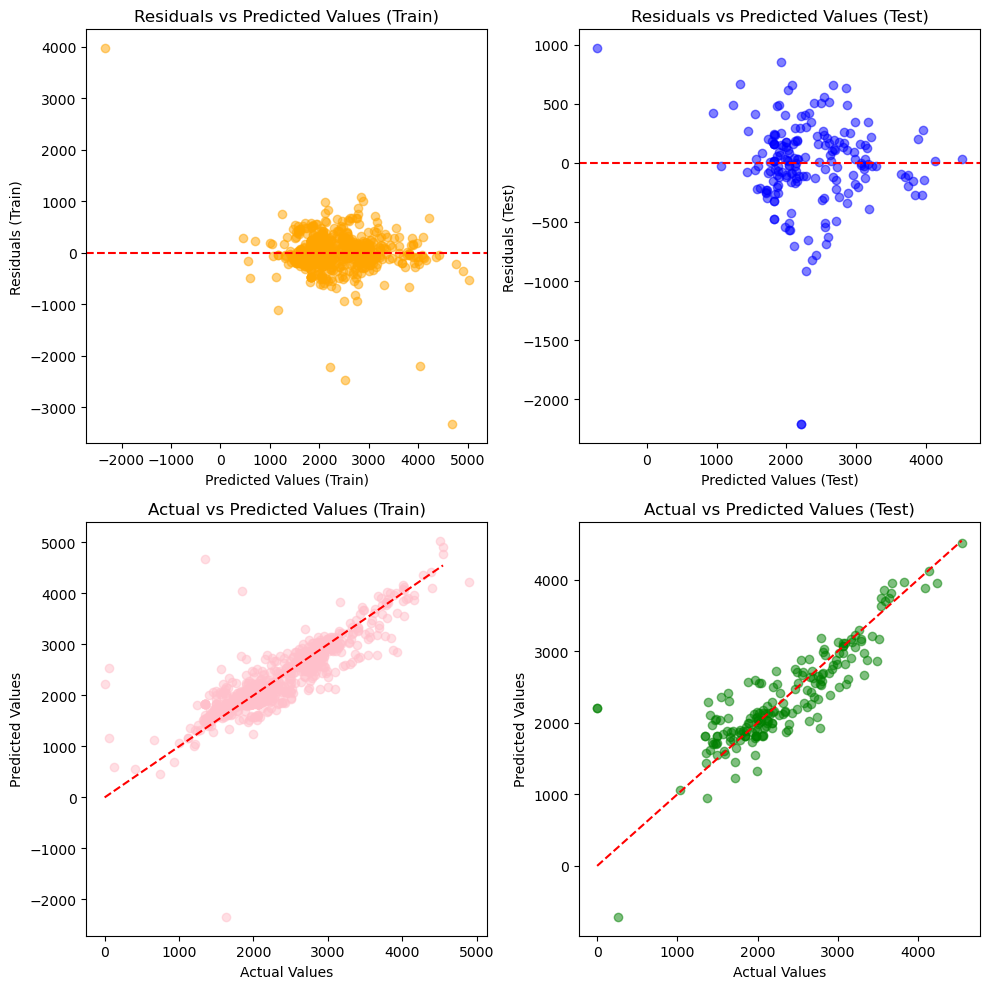

In [1255]:
huber_model = HuberRegressor()
huber_results = evaluate_model(huber_model, 'Huber Regression')
results.append(huber_results)

## RANSAC Regression

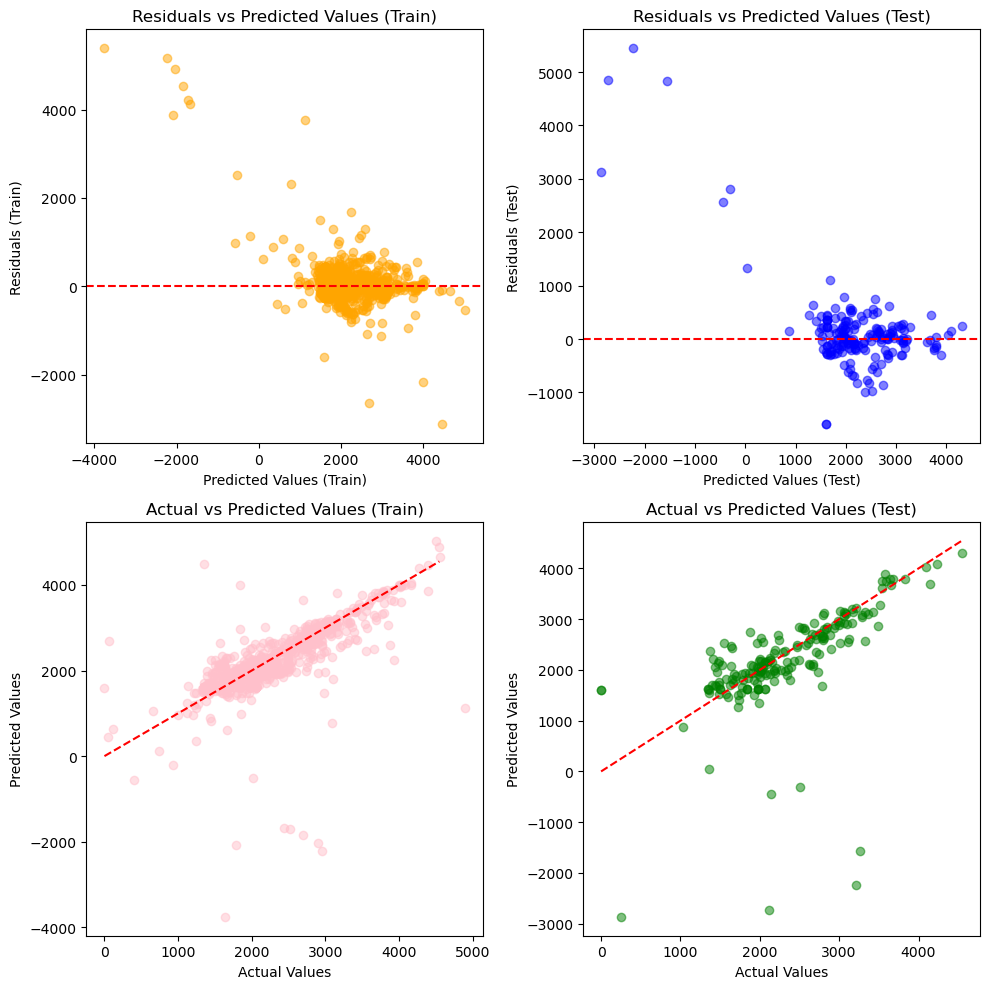

In [1256]:
ransac_model = RANSACRegressor(random_state=42)
ransac_results = evaluate_model(ransac_model, 'RANSAC Regression')
results.append(ransac_results)

## Theil-Sen Regression

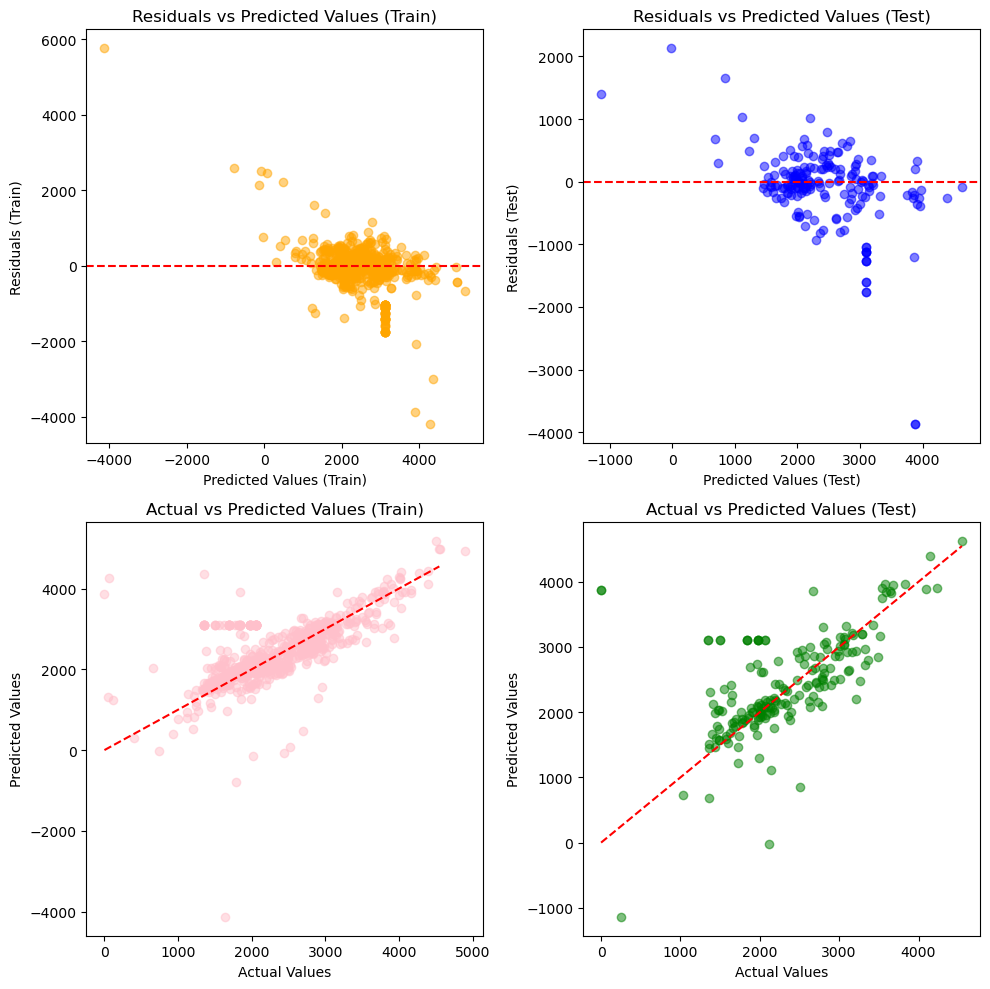

In [1257]:
theil_sen_model = TheilSenRegressor(random_state=42)
theil_sen_results = evaluate_model(theil_sen_model, 'Theil-Sen Regression')
results.append(theil_sen_results)

## Hasil

In [1260]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

# Menentukan urutan kolom yang diinginkan
columns_order = [
    'Model', 'Training Time (s)', 
    'RMSE Train', 'RMSE Test', 'RMSE Difference',
    'R2 Train', 'R2 Test', 'R2 Difference',
    'MAE Train', 'MAE Test', 'MAE Difference',
    'Mean Residual Train', 'Mean Residual Test',
    'MAPE Train', 'MAPE Test', 'MAPE Difference'
]

# Mengatur urutan kolom dan mengurutkan hasil berdasarkan beberapa metrik
results_df = results_df[columns_order].sort_values(
    by=['RMSE Test', 'RMSE Train', 'RMSE Difference'],
    ascending=[True, True, True]
)

pd.options.display.float_format = '{:.4f}'.format
# Tampilkan DataFrame hasil
results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
12     Extra Trees Regressor             2.4856     62.2180   265.0117   
7          Gradient Boosting             2.2525    146.1993   291.4449   
10        CatBoost Regressor            12.4584     78.2319   292.0874   
0              Random Forest             4.1409    121.3056   298.5423   
6                    XGBoost             1.5874     62.5148   302.9949   
11        LightGBM Regressor             1.0542    124.2553   320.8884   
13         AdaBoostRegressor             1.6044    290.2371   364.5710   
1          Linear Regression             0.7772    322.6313   377.4003   
9             Bayesian Ridge             1.6614    323.4706   379.3240   
2                      Ridge             0.7882    323.9303   379.4610   
3                      Lasso             0.7912    324.3868   382.0459   
14          Huber Regression             0.9202    356.0392   383.3312   
5              Decision Tree             0.7852     62.2180   390.7019   
4                Elastic Net             0.7977    440.8503   479.1634   
16      Theil-Sen Regression             5.4563    535.0279   668.0890   
8   Support Vector Regressor             1.0912    714.8224   744.7905   
15         RANSAC Regression             1.2083  12193.5924   823.9528   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
12         202.7937    0.9923   0.8710        -0.1213    13.7733  179.8124   
7          145.2455    0.9573   0.8440        -0.1133   109.9375  207.0108   
10         213.8555    0.9878   0.8433        -0.1445    47.8428  191.8633   
0          177.2367    0.9706   0.8363        -0.1343    78.5420  202.6436   
6          240.4801    0.9922   0.8313        -0.1608    15.4049  204.1386   
11         196.6331    0.9692   0.8108        -0.1584    72.8291  211.1873   
13          74.3339    0.8319   0.7558        -0.0761   247.6762  303.6249   
1           54.7690    0.7917   0.7383        -0.0534   242.1836  275.5172   
9           55.8534    0.7906   0.7357        -0.0550   243.2522  277.9607   
2           55.5308    0.7901   0.7355        -0.0546   243.4197  278.0825   
3           57.6590    0.7895   0.7319        -0.0576   243.5561  279.1617   
14          27.2920    0.7452   0.7300        -0.0152   217.8638  253.7263   
5          328.4839    0.9923   0.7196        -0.2727    13.7733  241.1920   
4           38.3131    0.6120   0.5782        -0.0338   361.0805  377.1493   
16         133.0611    0.4217   0.1800        -0.2417   311.3960  397.2784   
8           29.9681   -0.0197  -0.0191         0.0006   540.4305  568.4678   
15      -11369.6396 -746.3992  -0.2472       746.1520  2176.8462  388.3676   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
12        166.0391               0.0000             14.8975   
7          97.0733               0.0000              5.0126   
10        144.0205              -0.0188              6.1504   
0         124.1016              -2.9792              9.7615   
6         188.7337              -0.0000             32.9813   
11        138.3582               0.0000             19.9811   
13         55.9487              19.0274             56.1249   
1          33.3336               0.0000            -12.1660   
9          34.7085               0.0000             -8.7070   
2          34.6628              -0.0000             -8.5172   
3          35.6056               0.0000             -5.6356   
14         35.8625               4.0324            -13.9339   
5         227.4187               0.0000             41.0161   
4          16.0688              -0.0000             41.1815   
16         85.8824             -79.6076           -103.0414   
8          28.0373             174.1194            199.4700   
15      -1788.4785              77.5685            132.8649   

               MAPE Train               MAPE Test         MAPE Difference  
12                 0.0082                  0.0864                  0.0783 

In [1261]:
# results_df = pd.DataFrame(results)

# # Sesuaikan nama kolom dengan hasil dari evaluate_model
# results_df['RMSE Difference'] = results_df['Test RMSE'] - results_df['Train RMSE']
# results_df['R2 Difference'] = results_df['Test R2'] - results_df['Train R2']
# results_df['MAE Difference'] = results_df['Test MAE'] - results_df['Train MAE']
# results_df['MAPE Difference'] = results_df['Test MAPE'] - results_df['Train MAPE']

# columns_order = ['Model', 'Training Time (s)', 
#                  'Train RMSE', 'Test RMSE', 'RMSE Difference',
#                  'Train R2', 'Test R2', 'R2 Difference',
#                  'Train MAE', 'Test MAE', 'MAE Difference', 
#                  'Residual Mean Train', 'Residual Mean Test',
#                  'Train MAPE', 'Test MAPE', 'MAPE Difference']

# results_df = results_df[columns_order].sort_values(by=['Test RMSE', 'Train RMSE', 'RMSE Difference'], ascending=[True, True, True])

# results_df

# Model: Tuning

In [1262]:
from sklearn.model_selection import GridSearchCV

In [1263]:
results = []

## Random Forest

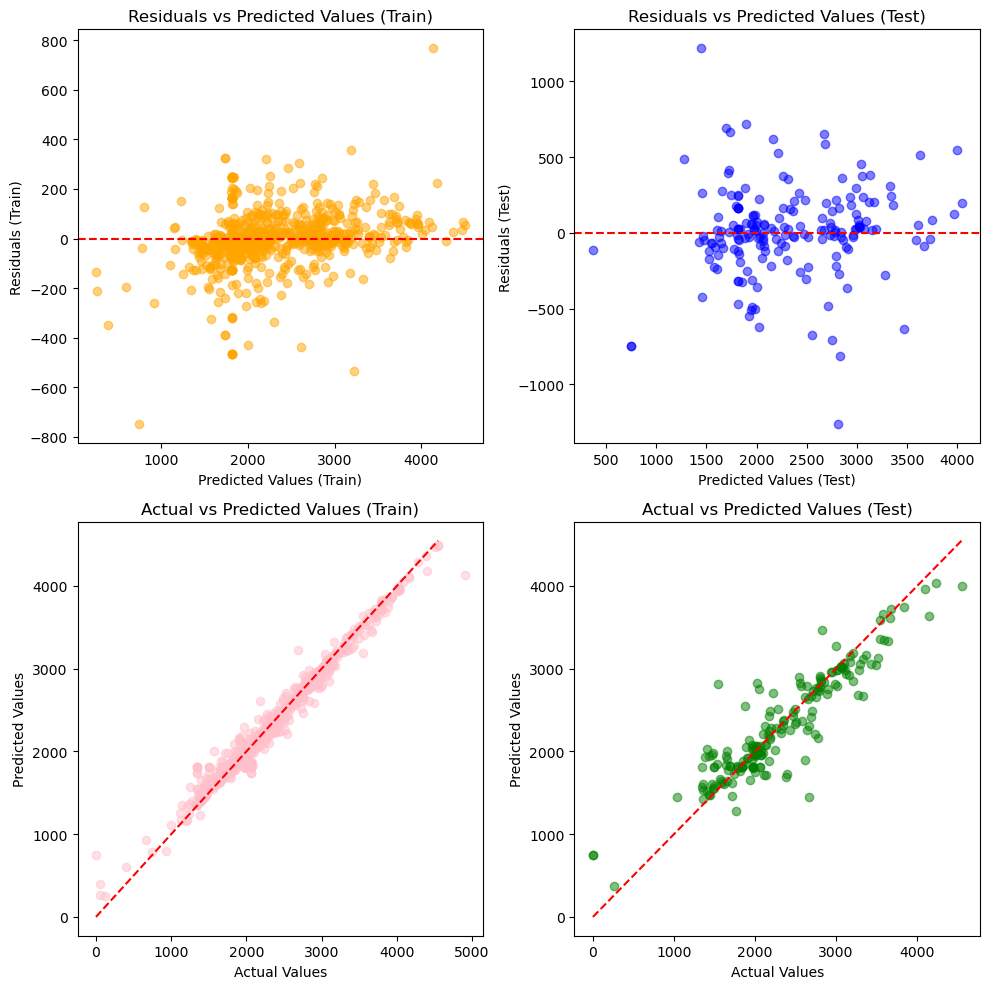

In [1264]:
rf_params = {
    'n_estimators': [100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20],  # Kedalaman pohon
    # 'min_samples_split': [2, 10],  # Minimum sampel untuk split
}

rf_model = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, scoring='neg_mean_absolute_error', cv=3)
rf_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(rf_model.best_estimator_, 'Random Forest'))

## Linear Regression (no tuning needed)

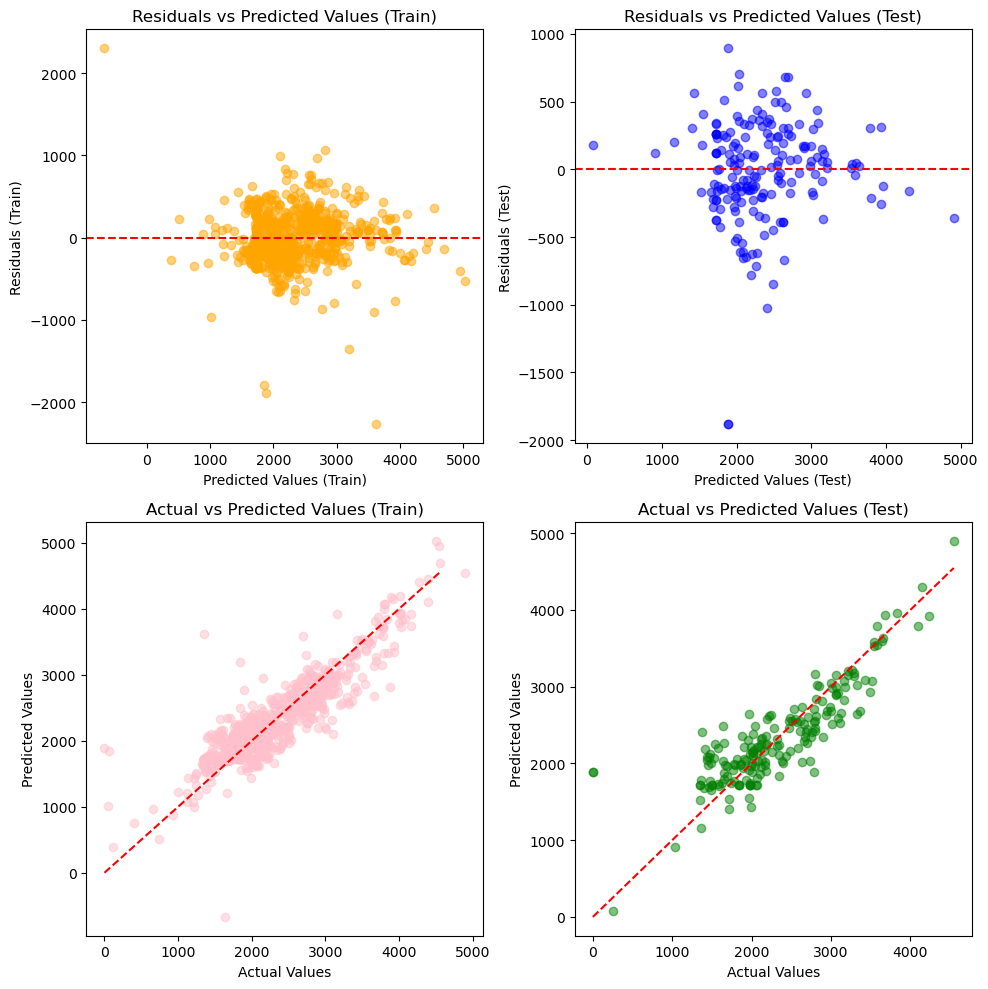

In [1265]:
results.append(evaluate_model(LinearRegression(), 'Linear Regression'))

## Ridge

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


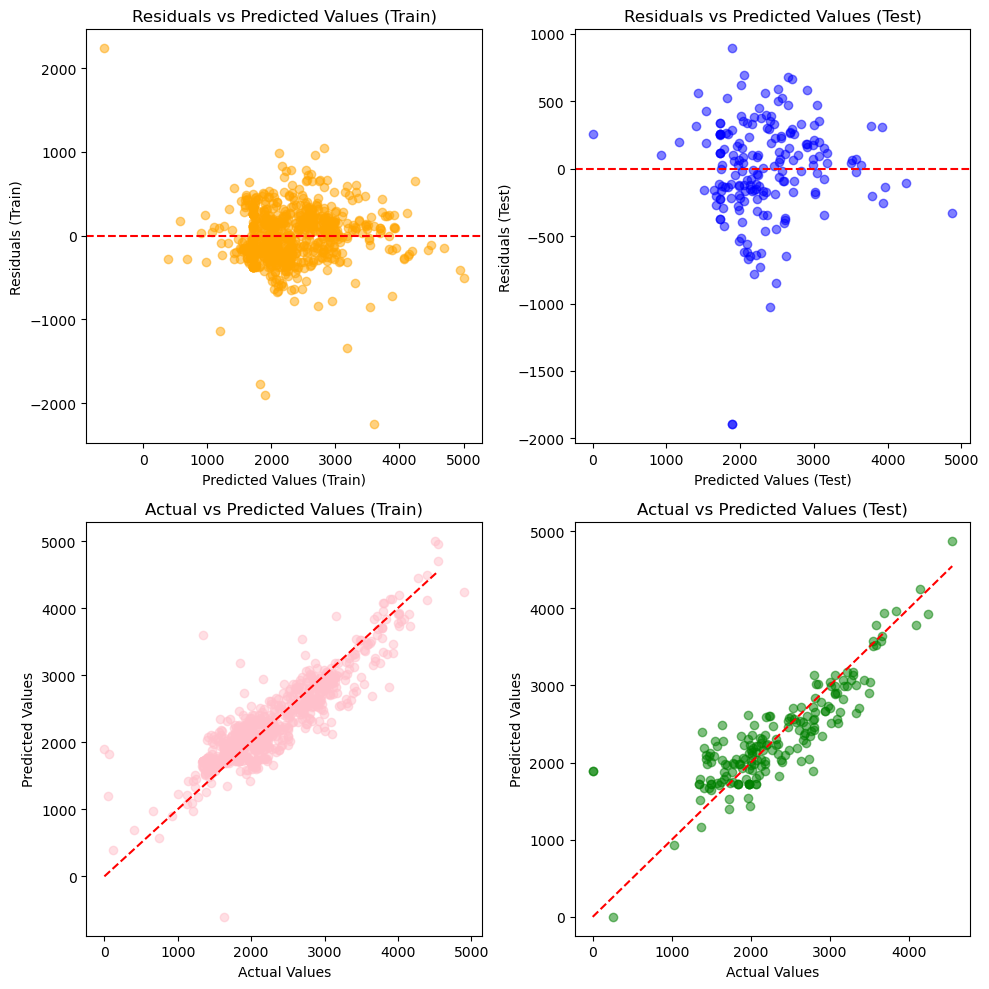

In [1266]:
ridge_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],            
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000, 10000, 20000, 30000]                      
}
ridge_model = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_absolute_error', cv=3)
ridge_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(ridge_model.best_estimator_, 'Ridge'))

## Lasso

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.000e+07, tolerance: 2.597e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.888e+07, tolerance: 2.439e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+07, tolerance: 

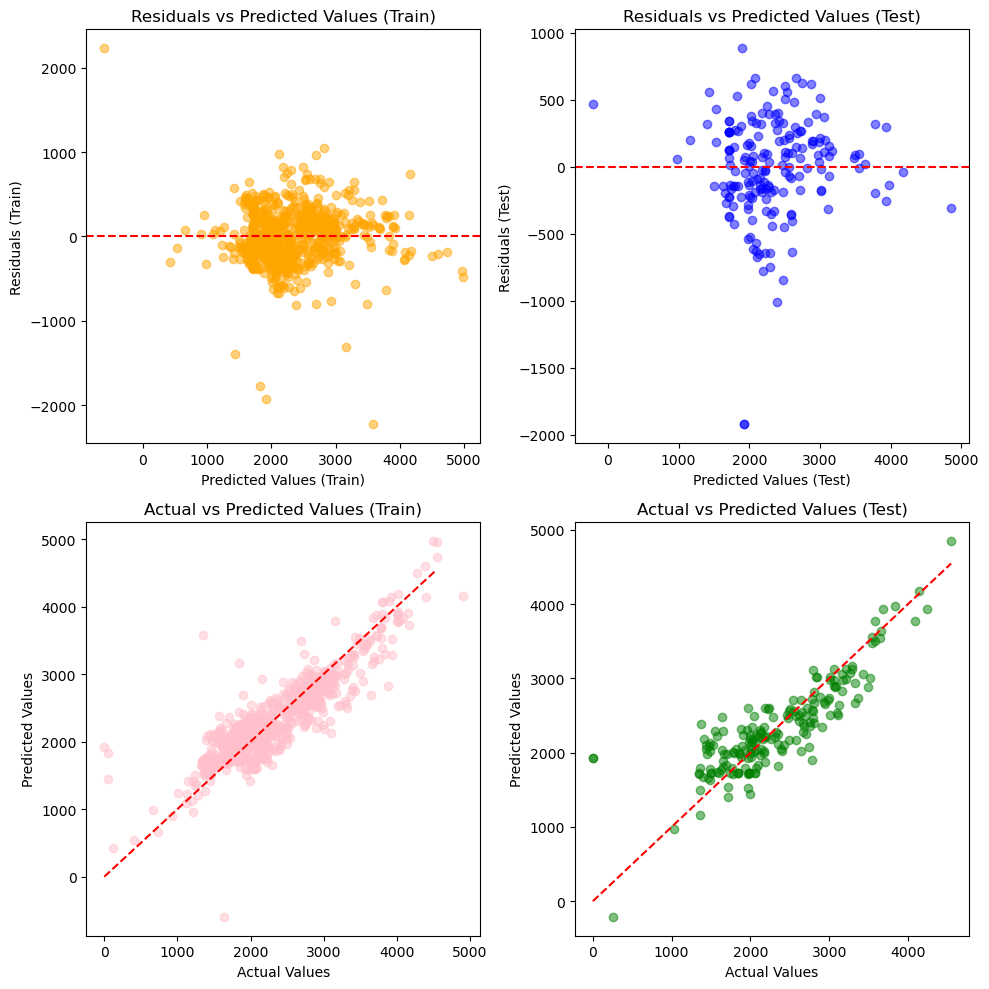

In [1267]:
# Lasso dengan tuning
lasso_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, None],     # Expanded range including 1.0 as baseline
    'fit_intercept': [True, False],            # Baseline of True
    'max_iter': [1000, 5000, 10000, 20000, 30000],           # Baseline of 1000, adding higher values
    'tol': [1e-4, 1e-3, 1e-2]                  # Adding tolerance to control convergence
}
lasso_model = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_absolute_error', cv=3)
lasso_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(lasso_model.best_estimator_, 'Lasso'))


## ElasticNet

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+07, tolerance: 2.597e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.539e+06, tolerance: 2.439e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.497e+06, tolerance: 

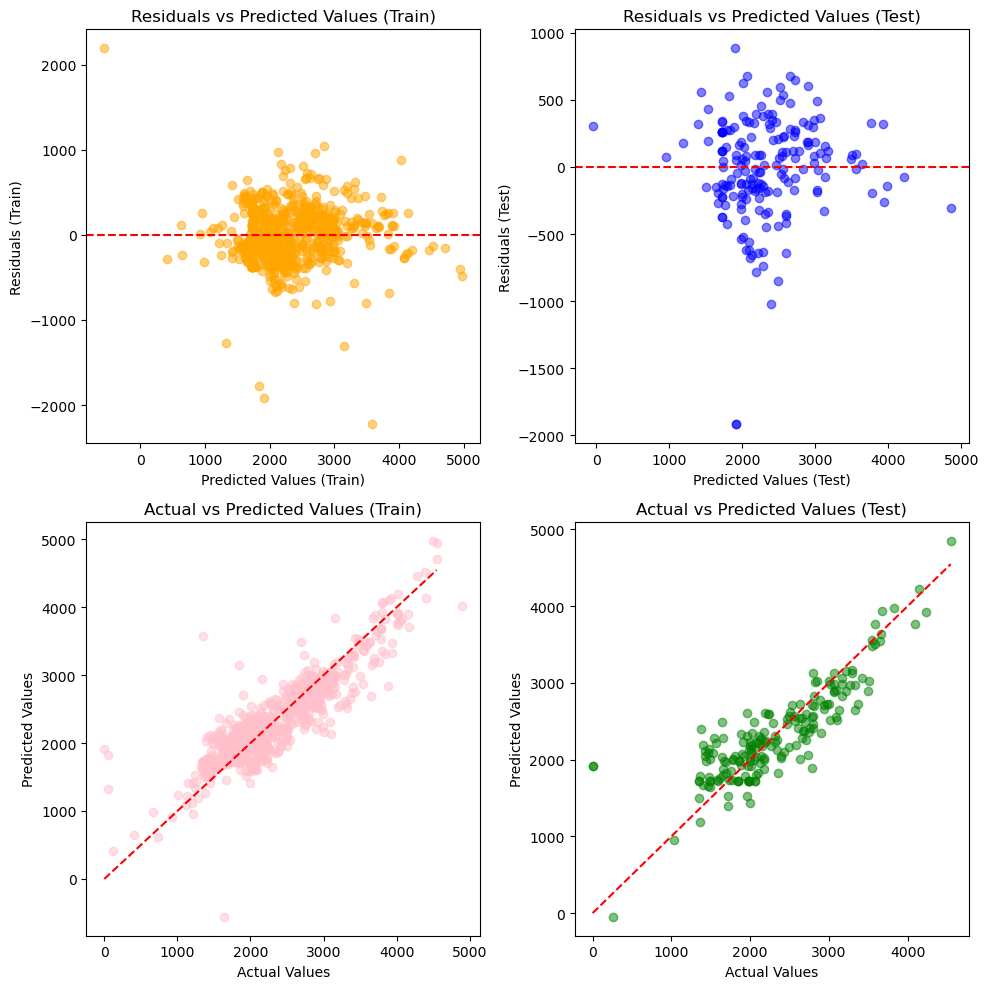

In [1268]:
elastic_params = {
    'alpha': [0.01, 0.1, 1.0, 10.0, None],     # Baseline 1.0 included
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],          # Additional values for l1_ratio
    'fit_intercept': [True, False],            # Baseline of True
    'max_iter': [1000, 5000, 10000, 20000, 30000],           # Baseline 1000, adding higher values
    'tol': [1e-4, 1e-3, 1e-2]                  # Additional tolerance values for convergence
}
elastic_model = GridSearchCV(ElasticNet(), elastic_params, scoring='neg_mean_absolute_error', cv=3)
elastic_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(elastic_model.best_estimator_, 'Elastic Net'))

## Decision Tree

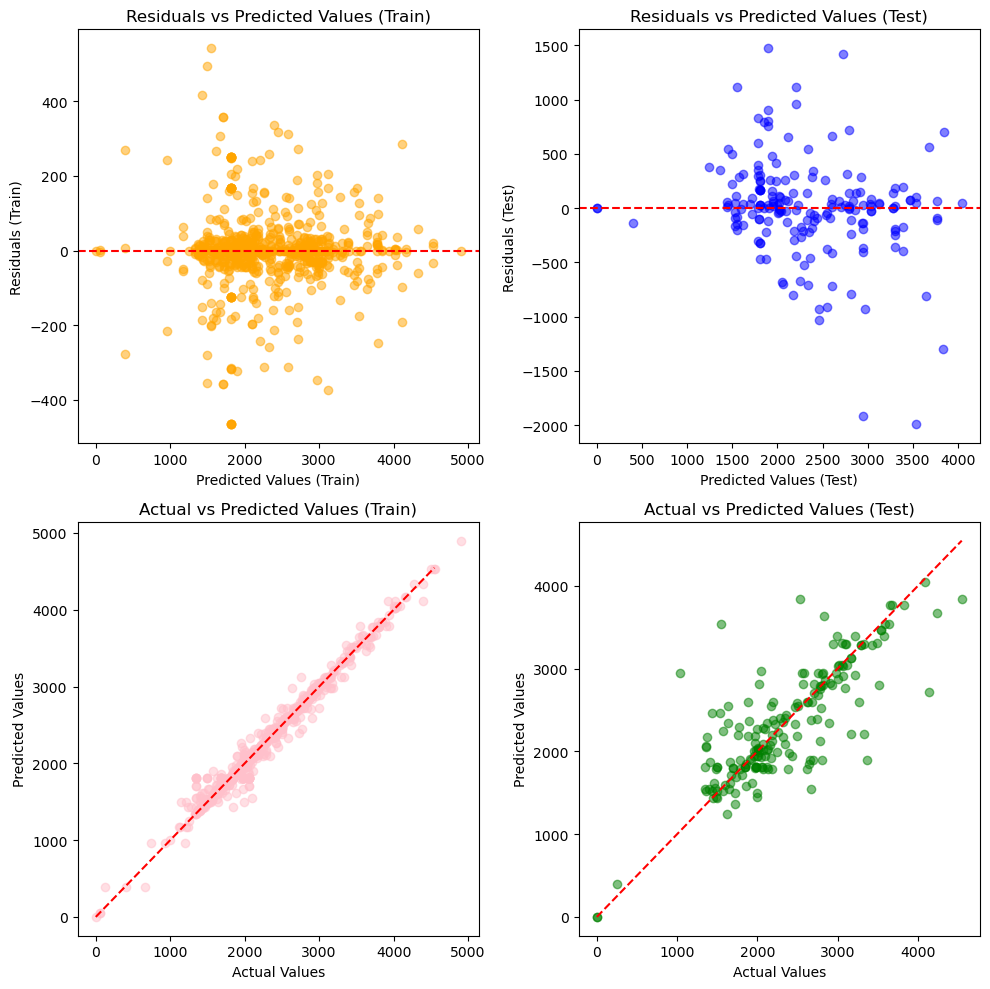

In [1269]:
# Decision Tree dengan tuning
dt_params = {
    'max_depth': [None, 10, 20],                # Baseline None tetap ada (tiada pembatas kedalaman pohon)
    'min_samples_split': [2, 5],                 # Baseline 2 tetap ada (minimum sampel untuk pembagian)
    'min_samples_leaf': [1, 2],                   # Baseline 1 tetap ada (minimum sampel untuk daun)
    'max_features': [None, 'sqrt', 'log2']          # Baseline None tetap ada (menggunakan semua fitur)
}

dt_model = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, scoring='neg_mean_absolute_error', cv=3)
dt_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(dt_model.best_estimator_, 'Decision Tree'))

## XGBoost

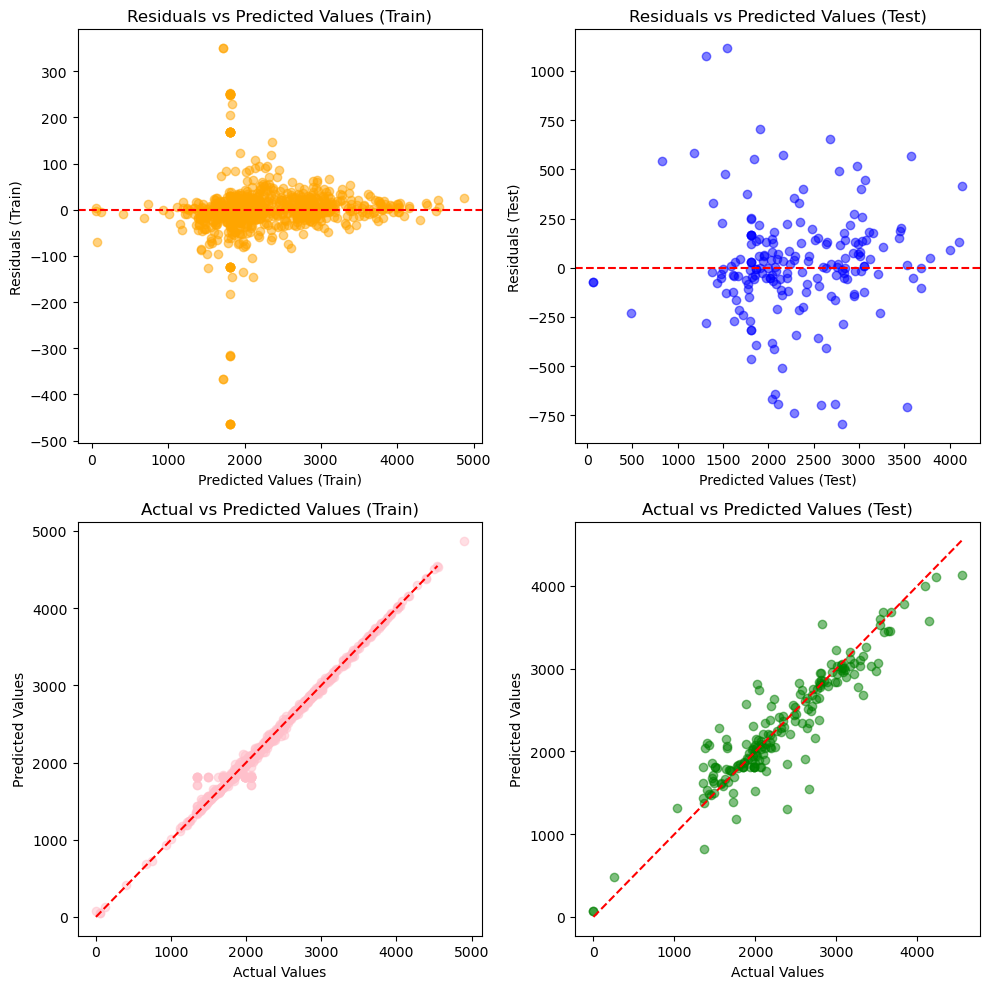

In [1270]:
xgb_params = {
    'n_estimators': [100, 200],             # Menambahkan baseline n_estimators
    'max_depth': [3, 5],                     # Kedalaman pohon yang terbatas (baseline 3 dan 5 tetap ada)
    'learning_rate': [0.01, 0.1],           # Kecepatan pembelajaran (baseline 0.1 tetap ada)
    'subsample': [0.8, 1.0]                  # Proporsi data yang digunakan (baseline 1.0 tetap ada)
}
xgb_model = GridSearchCV(XGBRegressor(random_state=42), xgb_params, scoring='neg_mean_absolute_error', cv=3)
xgb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(xgb_model.best_estimator_, 'XGBoost'))


## Gradient Boosting

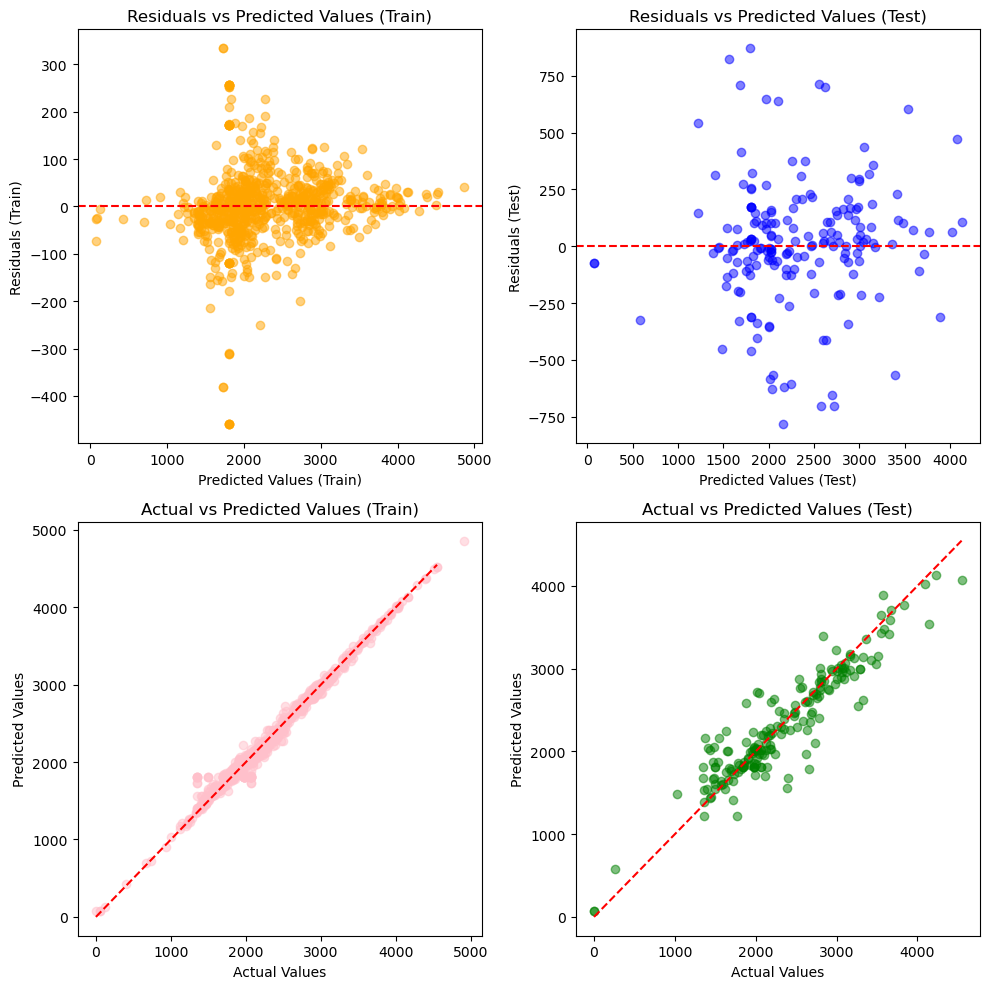

In [1271]:
gb_params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_model = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, scoring='neg_mean_absolute_error', cv=3)
gb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(gb_model.best_estimator_, 'Gradient Boosting'))

## SVR

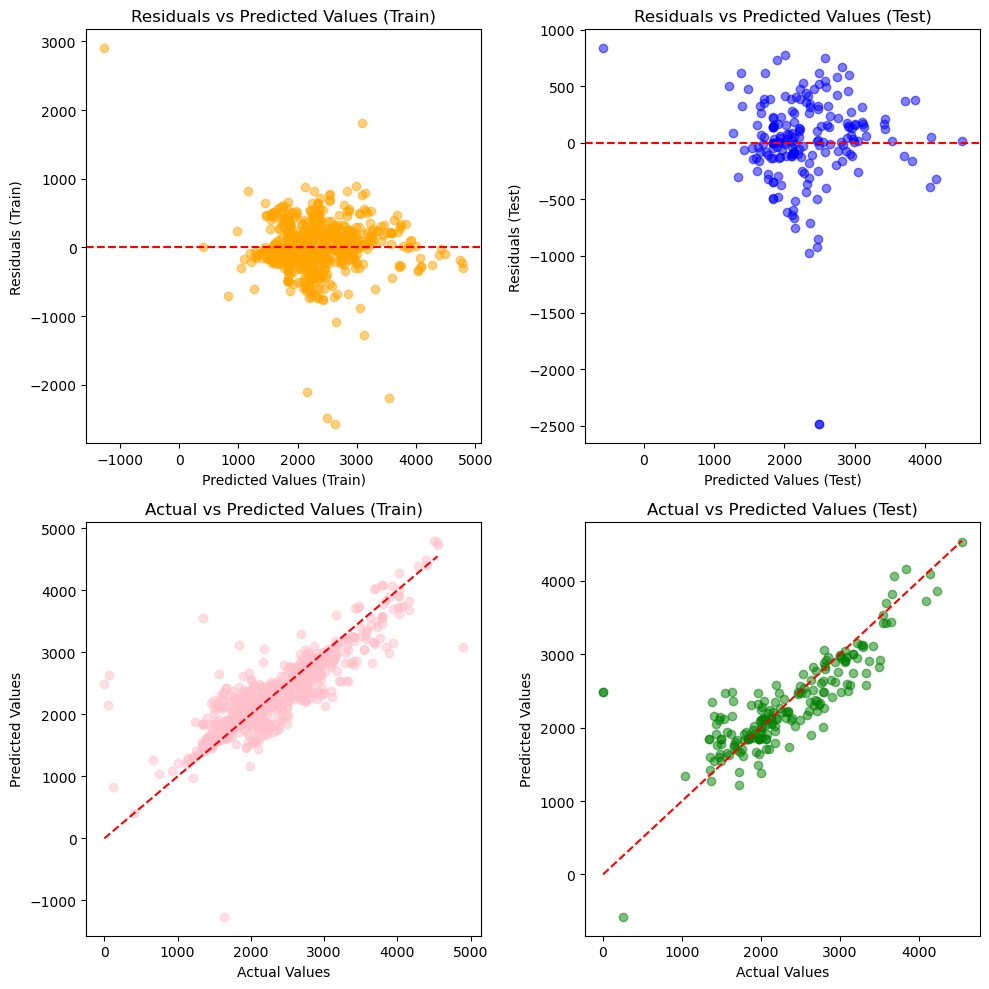

In [1272]:
# SVR dengan tuning
svr_params = {
    'C': [0.01, 0.1, 1.0, 10.0],               # Expanded range with 1.0 as baseline
    'epsilon': [0.01, 0.1, 0.2, 0.5],          # Wider epsilon range with 0.1 as baseline
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Baseline kernels maintained
}
svr_model = GridSearchCV(SVR(), svr_params, scoring='neg_mean_absolute_error', cv=3)
svr_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(svr_model.best_estimator_, 'SVR'))

## Bayesian Ridge

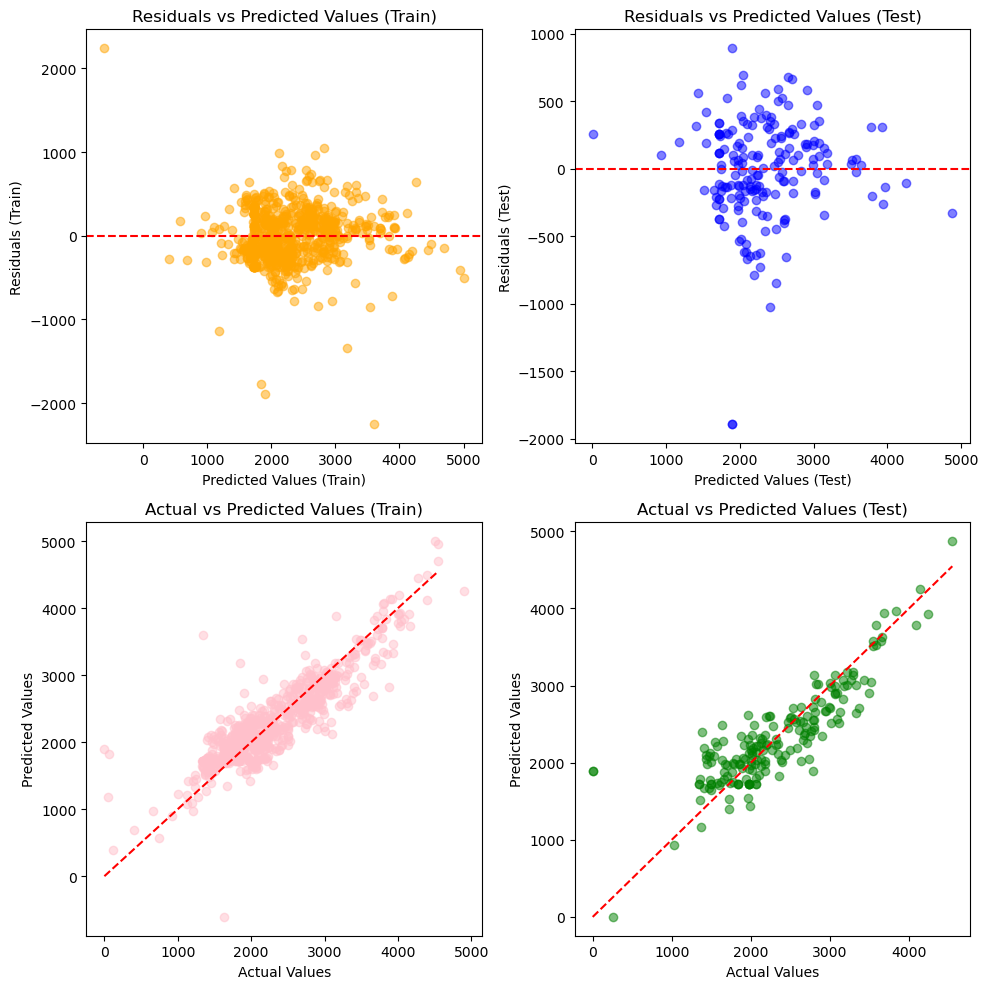

In [1273]:
bayesian_ridge_params = {
    'alpha_1': [1e-6, 1e-5, 1e-4],    # Baseline 1e-6 included, wider range
    'alpha_2': [1e-6, 1e-5, 1e-4],    # Baseline 1e-6 included, wider range
    'lambda_1': [1e-6, 1e-5, 1e-4],   # Baseline 1e-6 included, wider range
    'lambda_2': [1e-6, 1e-5, 1e-4],   # Baseline 1e-6 included, wider range
    'fit_intercept': [True, False]    # Baseline True included
}
bayesian_ridge_model = GridSearchCV(BayesianRidge(), bayesian_ridge_params, scoring='neg_mean_absolute_error', cv=3)
bayesian_ridge_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(bayesian_ridge_model.best_estimator_, 'Bayesian Ridge'))

## CatBoost

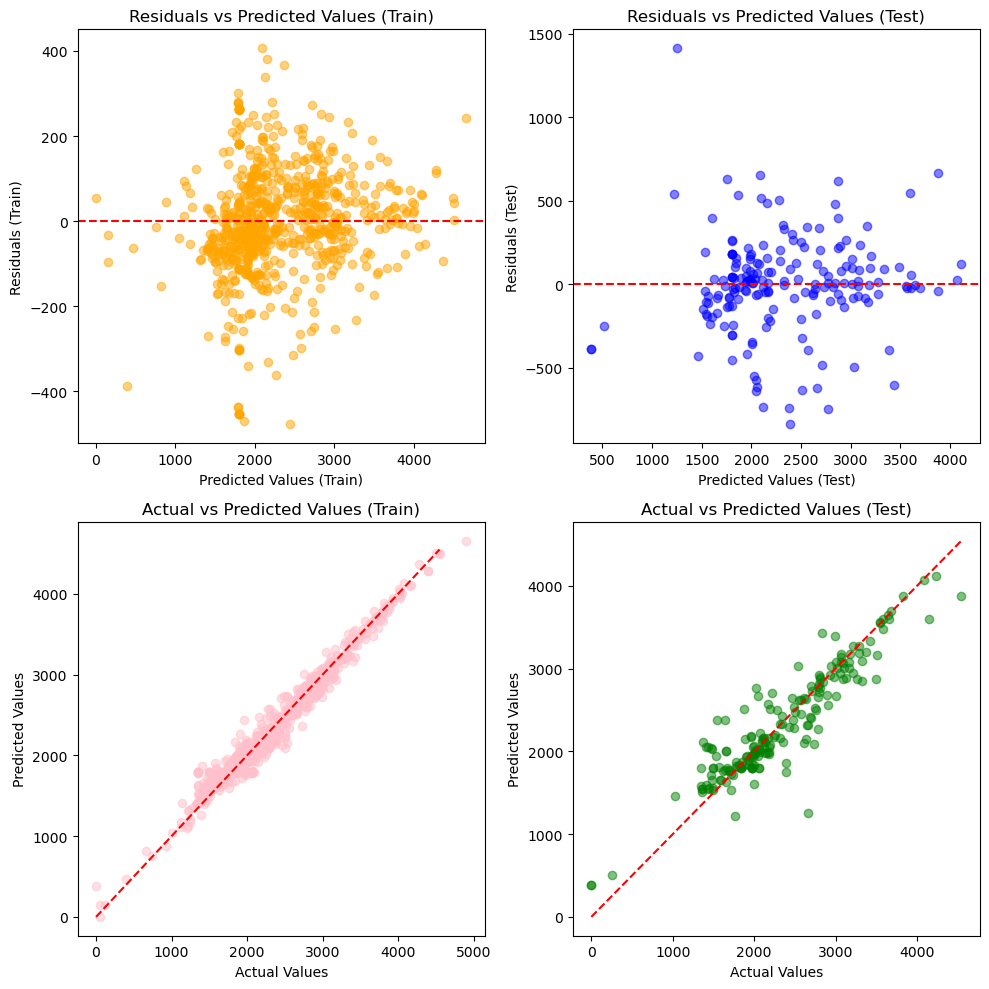

In [1274]:
cat_params = {
    'depth': [None, 6, 8], 
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5] 
}
cat_model = GridSearchCV(CatBoostRegressor(random_state=42,silent=True), cat_params, scoring='neg_mean_absolute_error', cv=3)
cat_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(cat_model.best_estimator_, 'CatBoost'))

## LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2592
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 21
[LightGBM] [Info] Start training from score 2279.692000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

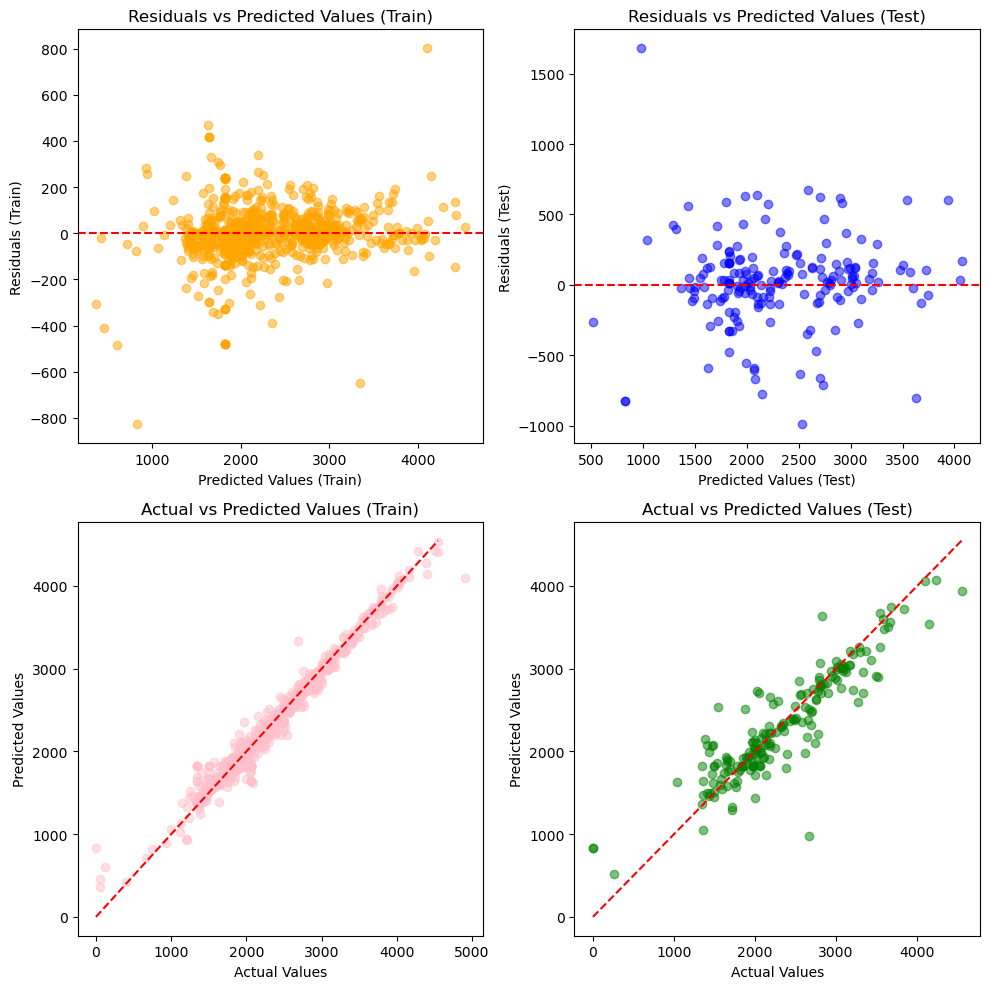

In [1275]:
lgb_params = {
    'num_leaves': [31, 61],            
    'learning_rate': [0.1, 0.2],       
    'max_depth': [None, 5, 10]         
}

lgb_model = GridSearchCV(LGBMRegressor(random_state=42), lgb_params, scoring='neg_mean_absolute_error', cv=3)
lgb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(lgb_model.best_estimator_, 'LightGBM'))


## Extra Trees

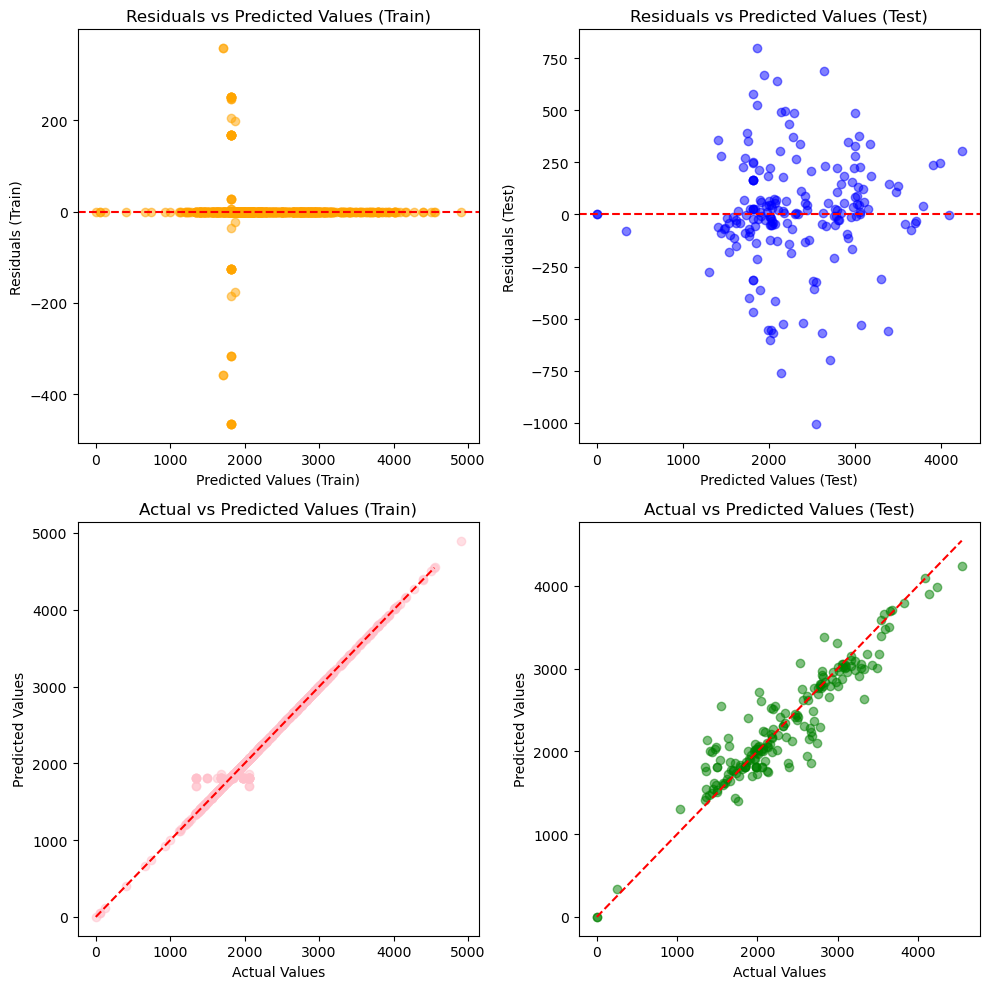

In [1276]:
et_params = {
    'n_estimators': [50, 100], 
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20]
}
et_model = GridSearchCV(ExtraTreesRegressor(random_state=42), et_params, scoring='neg_mean_absolute_error', cv=3)
et_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(et_model.best_estimator_, 'Extra Trees'))

## AdaBoost

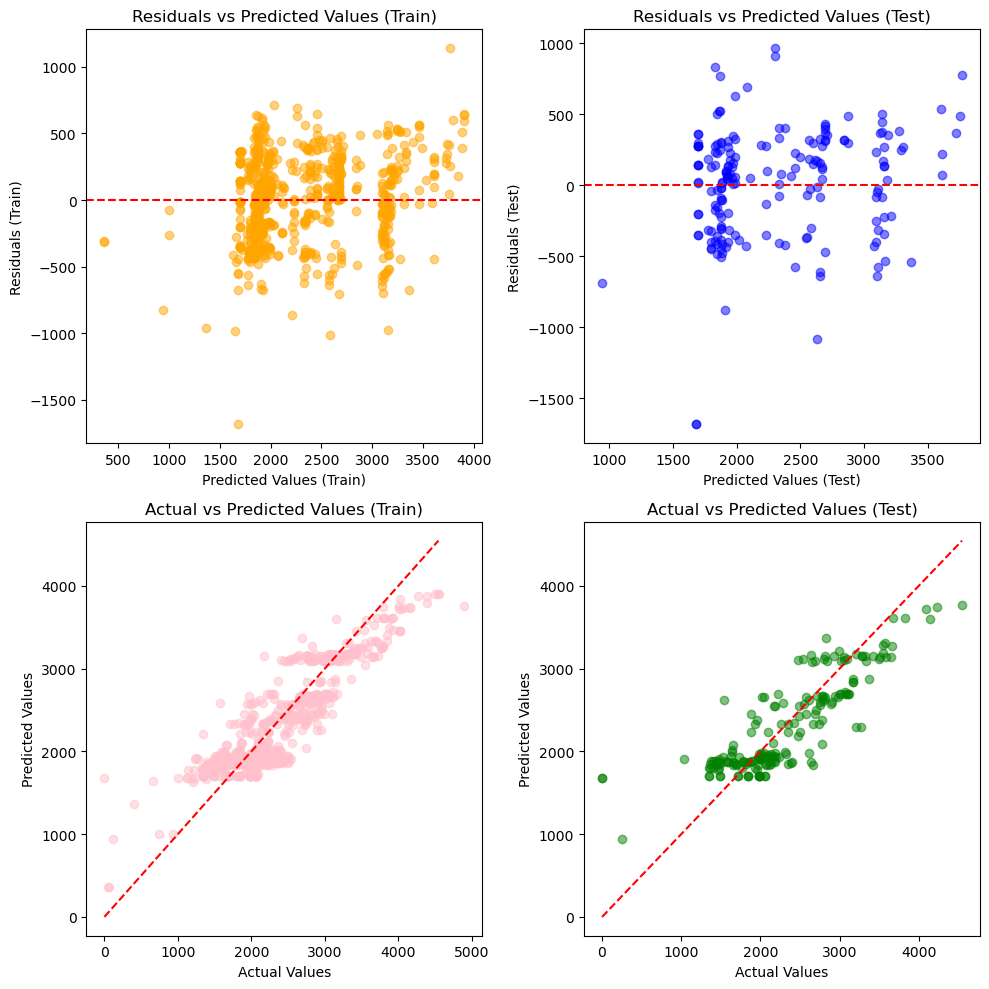

In [1277]:
ab_params = {
    'n_estimators': [50, 100, 200],   # Jumlah estimator (pohon dasar)
    'learning_rate': [0.01, 0.1, 1.0],  # Kecepatan pembelajaran
    'loss': ['linear', 'square', 'exponential']  # Fungsi loss
}

ab_model = GridSearchCV(AdaBoostRegressor(random_state=42), ab_params, scoring='neg_mean_absolute_error', cv=3)
ab_model.fit(X_train, y_train)  # Fit model
ab_results = evaluate_model(ab_model.best_estimator_, 'AdaBoostRegressor')  # Evaluasi model
results.append(ab_results)

## Huber Regression

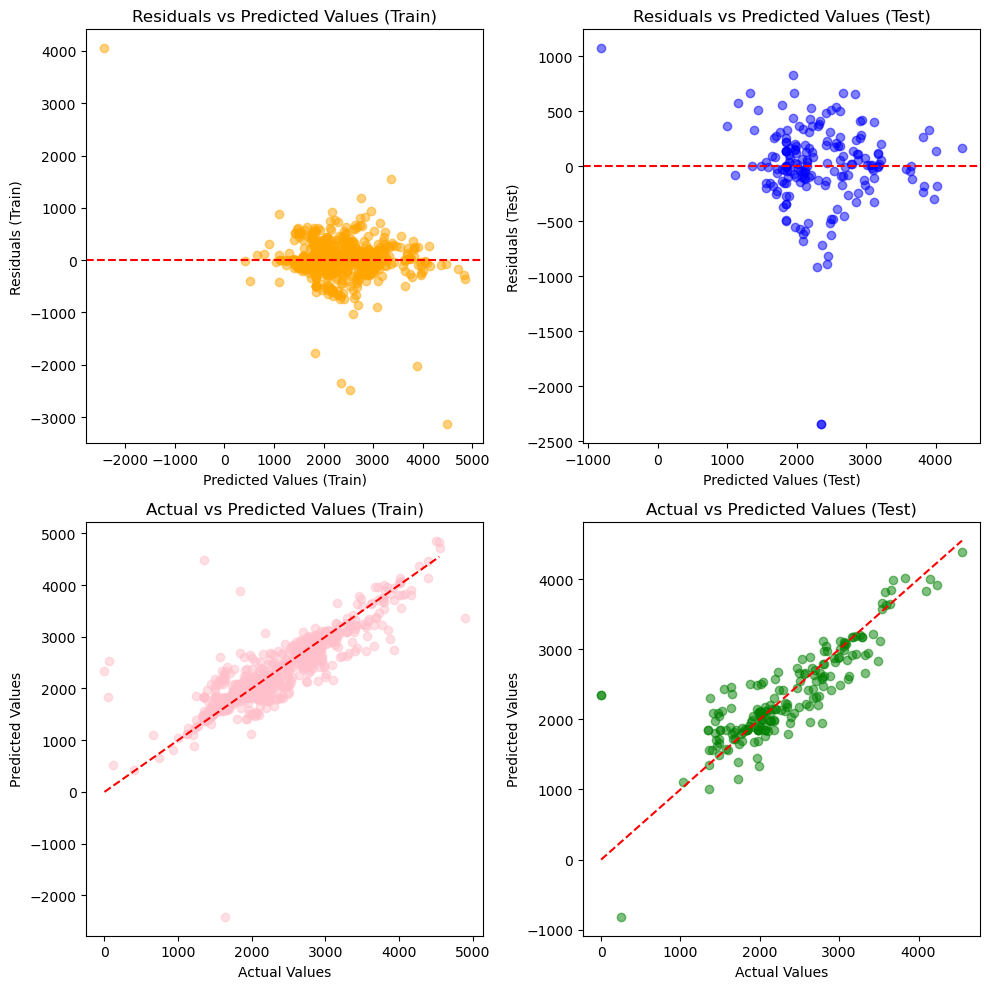

In [1278]:
huber_params = {
    'epsilon': [1.0, 1.35, 1.5],           # Parameter epsilon untuk Huber loss
    'alpha': [0.01, 0.1, 1.0, 10.0],      # Regularization strength
    'max_iter': [1000, 5000, 10000],       # Maksimum iterasi untuk konvergensi
    'fit_intercept': [True, False]         # Menggunakan intercept atau tidak
}

huber_model = GridSearchCV(HuberRegressor(), huber_params, scoring='neg_mean_absolute_error', cv=3)
huber_model.fit(X_train, y_train)  # Fit model
huber_results = evaluate_model(huber_model.best_estimator_, 'Huber Regression')
results.append(huber_results)

## RANSAC Regression

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

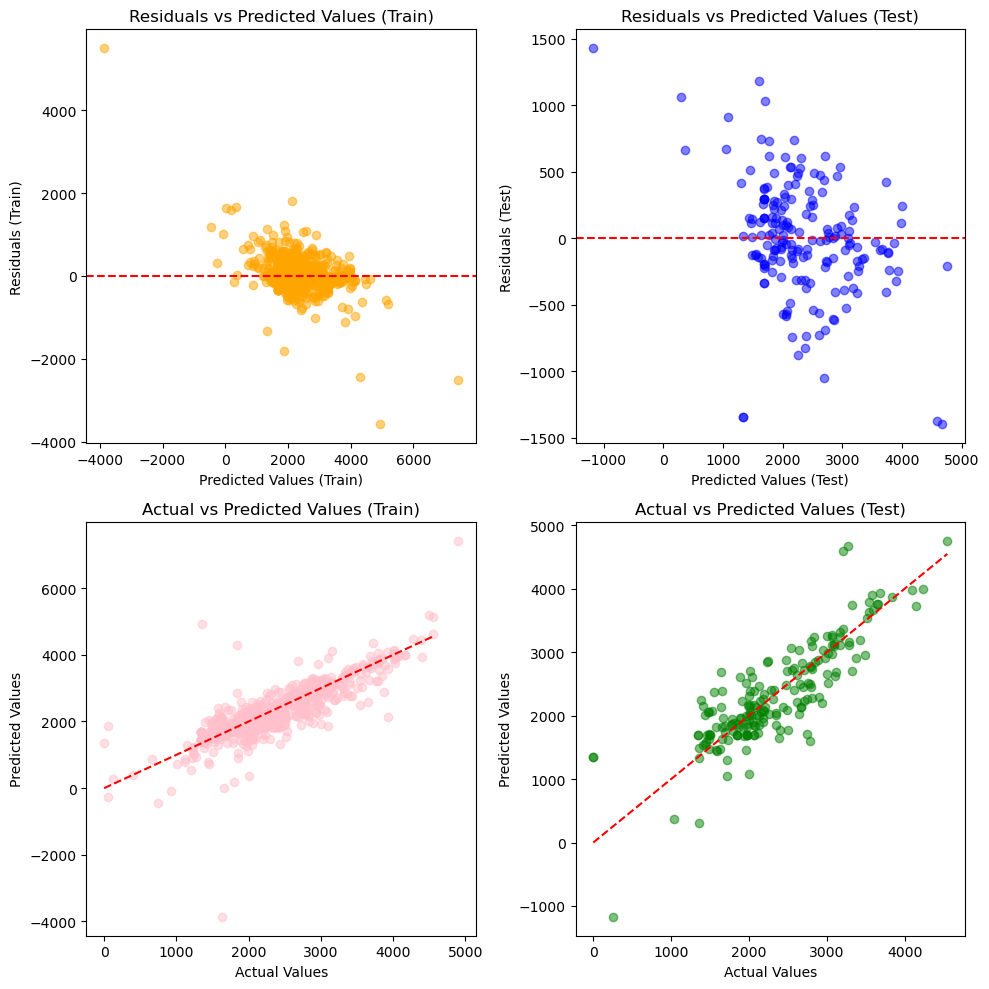

In [1279]:
ransac_params = {
    'min_samples': [0.1, 0.2, 0.5],              # Prosentase sampel yang digunakan untuk mencari model
    'residual_threshold': [5.0, 10.0, 15.0],     # Batas residual untuk menentukan inlier
    'max_trials': [100, 200, 500],               # Jumlah percobaan yang akan dilakukan
    'loss': ['absolute_error', 'squared_error'],   # Fungsi loss yang digunakan
    'stop_n_inliers': [100, float('inf')]         # Batas inlier yang dihentikan jika tercapai
}

ransac_model = GridSearchCV(RANSACRegressor(random_state=42), ransac_params, scoring='neg_mean_absolute_error', cv=3)
ransac_model.fit(X_train, y_train)  # Fit model
ransac_results = evaluate_model(ransac_model.best_estimator_, 'RANSAC Regression')
results.append(ransac_results)

## Theil-Sen Regression

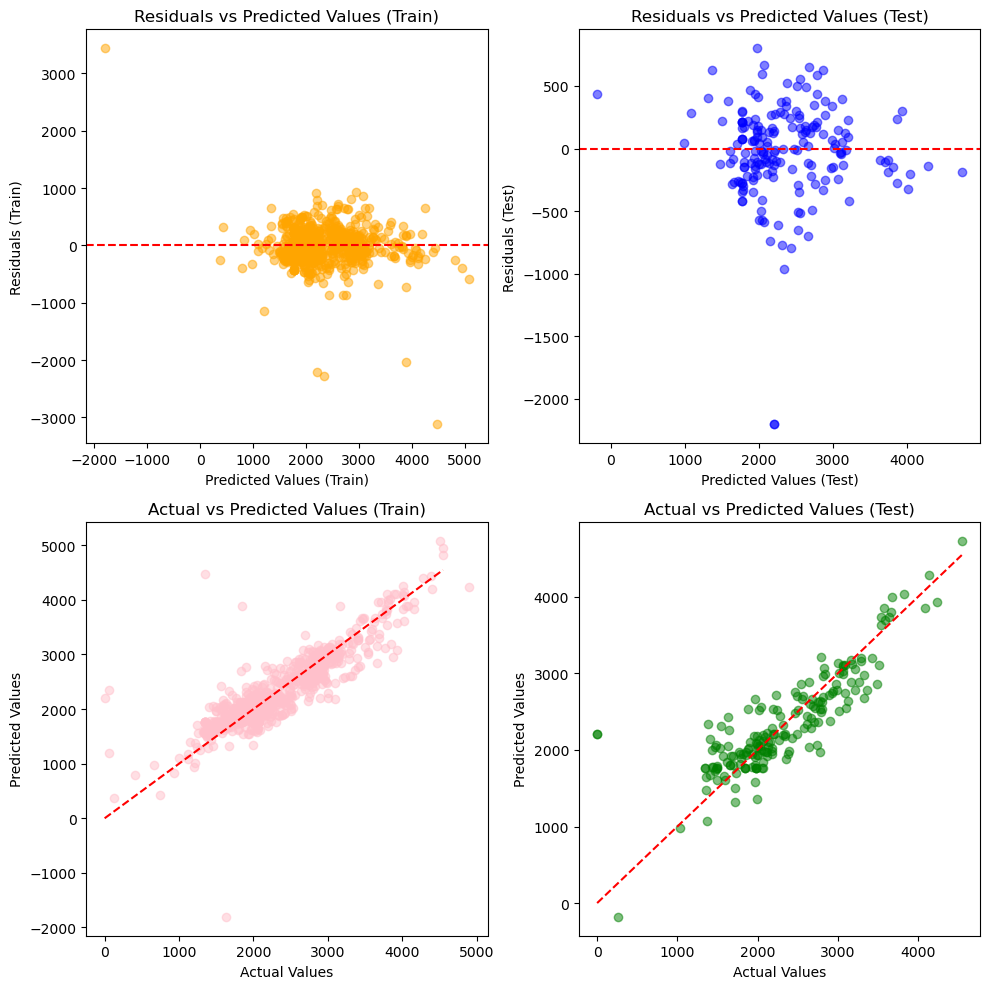

In [1280]:
theil_sen_params = {
    'max_iter': [1000, 5000, 10000],             # Maksimum iterasi untuk konvergensi
    'tol': [1e-4, 1e-3, 1e-2],                   # Toleransi untuk konvergensi
    'fit_intercept': [True, False],              # Menggunakan intercept atau tidak
    'n_subsamples': [None, 50, 100]            # Proporsi subsamples untuk estimator
}

theil_sen_model = GridSearchCV(TheilSenRegressor(random_state=42), theil_sen_params, scoring='neg_mean_absolute_error', cv=3)
theil_sen_model.fit(X_train, y_train)  # Fit model
theil_sen_results = evaluate_model(theil_sen_model.best_estimator_, 'Theil-Sen Regression')
results.append(theil_sen_results)

## Hasil

In [1281]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

results_df = results_df[columns_order].sort_values(by=['RMSE Test','RMSE Train','RMSE Difference'],ascending=[True,True,True])

results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
12           Extra Trees             2.4346     62.2180   265.0117   
7      Gradient Boosting             3.0487     72.9884   274.1551   
6                XGBoost             1.9104     65.7235   279.4904   
10              CatBoost             3.3264    112.1998   290.6372   
0          Random Forest             7.5147    120.1144   296.9153   
11              LightGBM             1.0032    129.5793   316.5502   
1      Linear Regression             0.8801    322.6313   377.4003   
9         Bayesian Ridge             0.7812    323.4706   379.3240   
2                  Ridge             0.8312    323.9303   379.4610   
16  Theil-Sen Regression             7.4857    339.3546   381.4001   
4            Elastic Net             0.8852    324.8223   381.7532   
3                  Lasso             0.8082    324.5214   382.5583   
13     AdaBoostRegressor             1.5964    307.0503   390.0764   
14      Huber Regression             1.2163    368.6921   395.5837   
8                    SVR             0.9132    368.1275   413.8791   
15     RANSAC Regression             1.5714   1072.3399   430.8495   
5          Decision Tree             0.8672    109.2010   448.1963   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
12         202.7937    0.9923   0.8710        -0.1213    13.7733  179.8124   
7          201.1668    0.9894   0.8619        -0.1274    41.4200  188.9067   
6          213.7669    0.9914   0.8565        -0.1349    27.4832  187.3404   
10         178.4373    0.9749   0.8448        -0.1301    81.6949  198.1805   
0          176.8009    0.9712   0.8380        -0.1331    78.1392  199.2633   
11         186.9709    0.9665   0.8159        -0.1506    80.7889  210.4665   
1           54.7690    0.7917   0.7383        -0.0534   242.1836  275.5172   
9           55.8534    0.7906   0.7357        -0.0550   243.2522  277.9608   
2           55.5308    0.7901   0.7355        -0.0546   243.4197  278.0825   
16          42.0454    0.7692   0.7328        -0.0365   225.1077  263.2112   
4           56.9309    0.7890   0.7323        -0.0567   244.1057  279.5863   
3           58.0368    0.7893   0.7311        -0.0582   243.5572  279.8255   
13          83.0261    0.8117   0.7205        -0.0913   246.4390  303.2546   
14          26.8917    0.7279   0.7125        -0.0154   218.7725  253.9168   
8           45.7516    0.7296   0.6853        -0.0443   257.2033  269.1953   
15        -641.4904   -3.2452   0.6590         3.9042   340.8155  311.8179   
5          338.9953    0.9762   0.6310        -0.3452    64.7376  285.1538   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
12        166.0391               0.0000             14.8975   
7         147.4867              -0.0000             12.6028   
6         159.8572               0.0449             17.0068   
10        116.4856              -0.0924             -1.4719   
0         121.1242              -3.0160              9.5374   
11        129.6777              -0.0000             19.2718   
1          33.3336               0.0000            -12.1660   
9          34.7085               0.0000             -8.7070   
2          34.6628              -0.0000             -8.5172   
16         38.1035              -5.4362            -21.2412   
4          35.4806               0.0000             -5.8079   
3          36.2683               0.0000             -4.7958   
13         56.8156              14.1336             14.5747   
14         35.1443              10.0362             -3.7127   
8          11.9920               9.9184             15.0856   
15        -28.9976              45.9082              3.8802   
5         220.4162               0.0000              2.4132   

               MAPE Train               MAPE Test         MAPE Difference  
12                 0.0082                  0.0864                  0.0783  
7    584123108406660.3750   3492455796636457.0000   29083326882297